In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

: 

# Choix des dates des time series

In [2]:
def add_confinement(ax):
    # premier confinement
    start_1= pd.to_datetime('2020-03-17')
    end_1 = pd.to_datetime('2020-05-11')
    ax.axvspan(start_1, end_1, alpha=0.2, color='red')

    # deuxième confinement
    start_2= pd.to_datetime('2020-10-30')
    end_2 = pd.to_datetime('2020-12-15')
    ax.axvspan(start_2, end_2, alpha=0.2, color='red')

    # troisième confinement
    start_3= pd.to_datetime('2021-04-03')
    end_3 = pd.to_datetime('2021-05-03')
    ax.axvspan(start_3, end_3, alpha=0.2, color='red')


In [ ]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)


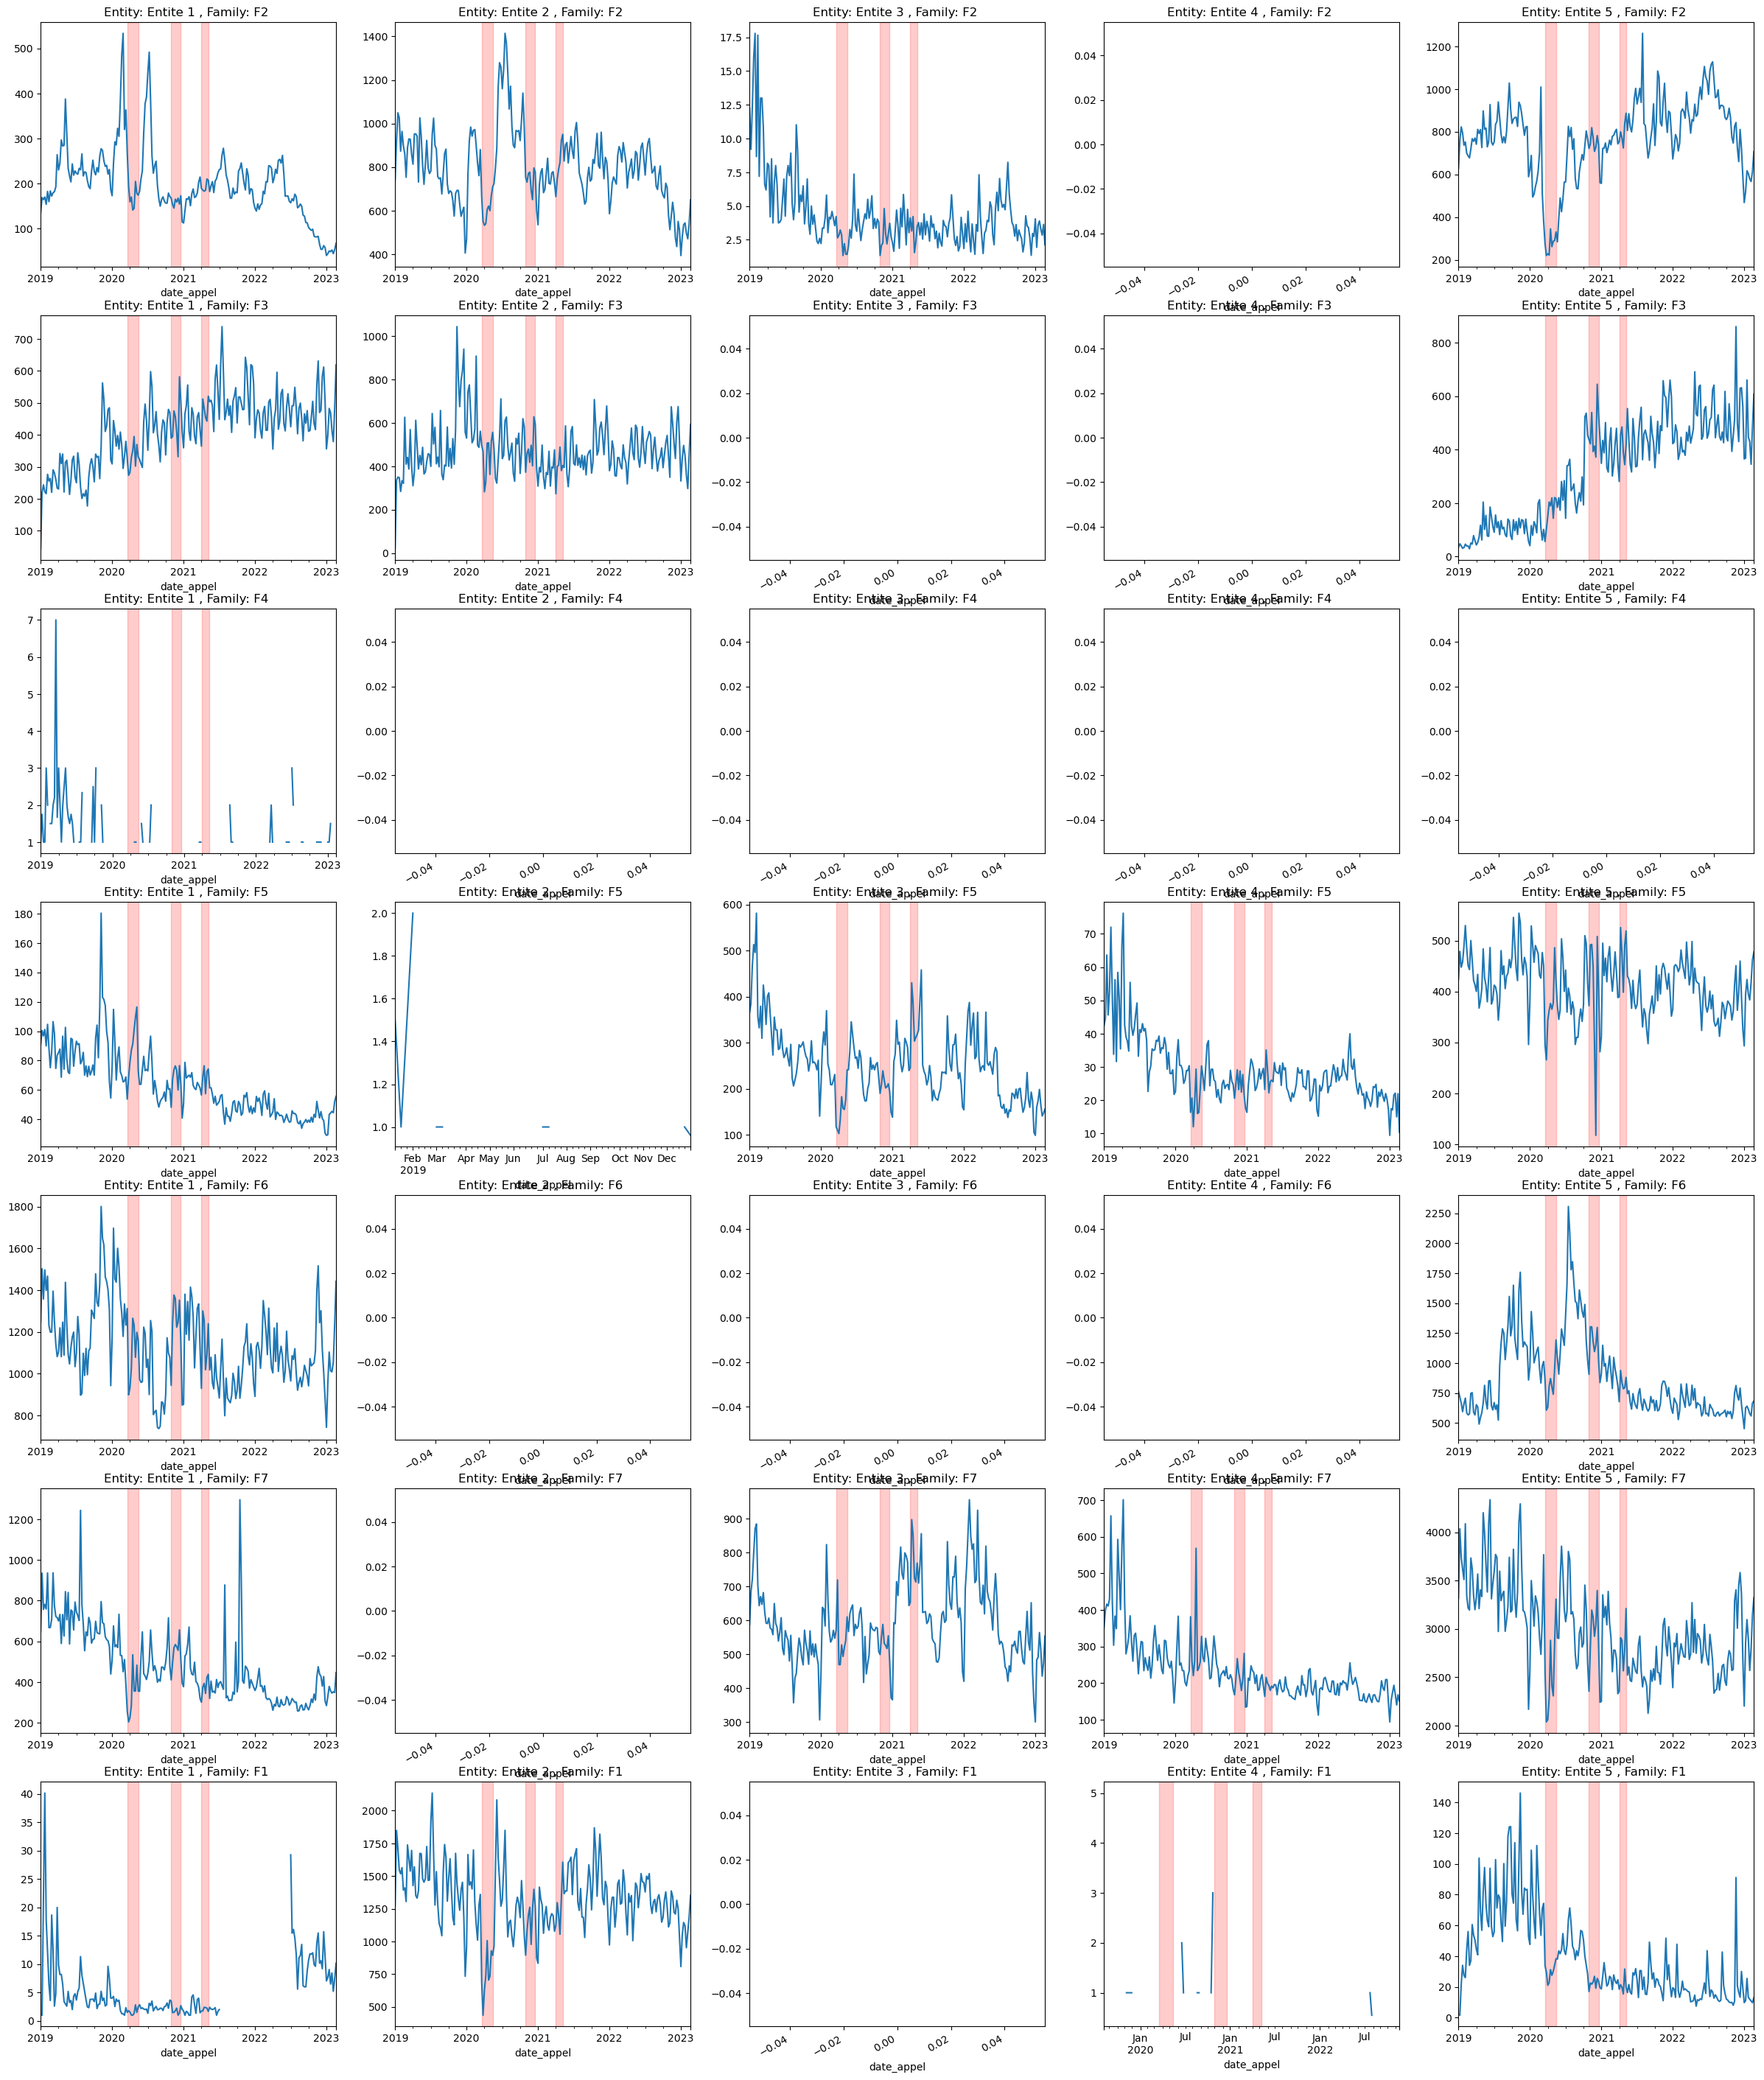

In [3]:

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0:  
            df['Nombre_entrants_corrige'].resample("W").mean().plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            add_confinement(ax)
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            



Conclusion:
- On commence après le covid
- On enlève F4
- On enlève E2 F5
- On enlève E4 F1
- On comence E1 F1 après le trou

In [19]:
df_tel = pd.read_csv('data/telephonie_clean.csv', index_col="date_appel", parse_dates = True)

# On commence après le covid
df_tel = df_tel.loc[ "2021-01-01":,:]

# On enlève F4
df_tel = df_tel[df_tel['Famille'] != "F4"]

# On enlève E2 F5 et E4 F1
df_tel = df_tel[~((df_tel['Entite'] == "Entite 2")&(df_tel['Famille'] == "F5"))]
df_tel = df_tel[~((df_tel['Entite'] == "Entite 4")&(df_tel['Famille'] == "F1"))]

# On comence E1 F1 après le trou
df_tel = df_tel[~((df_tel['Entite'] == "Entite 1")&(df_tel['Famille'] == "F1")&(df_tel.index < "2022-01-01"))]
df_tel = df_tel.sort_values(['Entite','Famille'],ascending = True)

df_tel
df_tel.to_csv("data/telephonie_select.csv")

# Analyse de la tendance

On utilise une double méthode:
- on regarde graphique la tendance
- on regarde si l'ACF converge vite

In [29]:
df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)

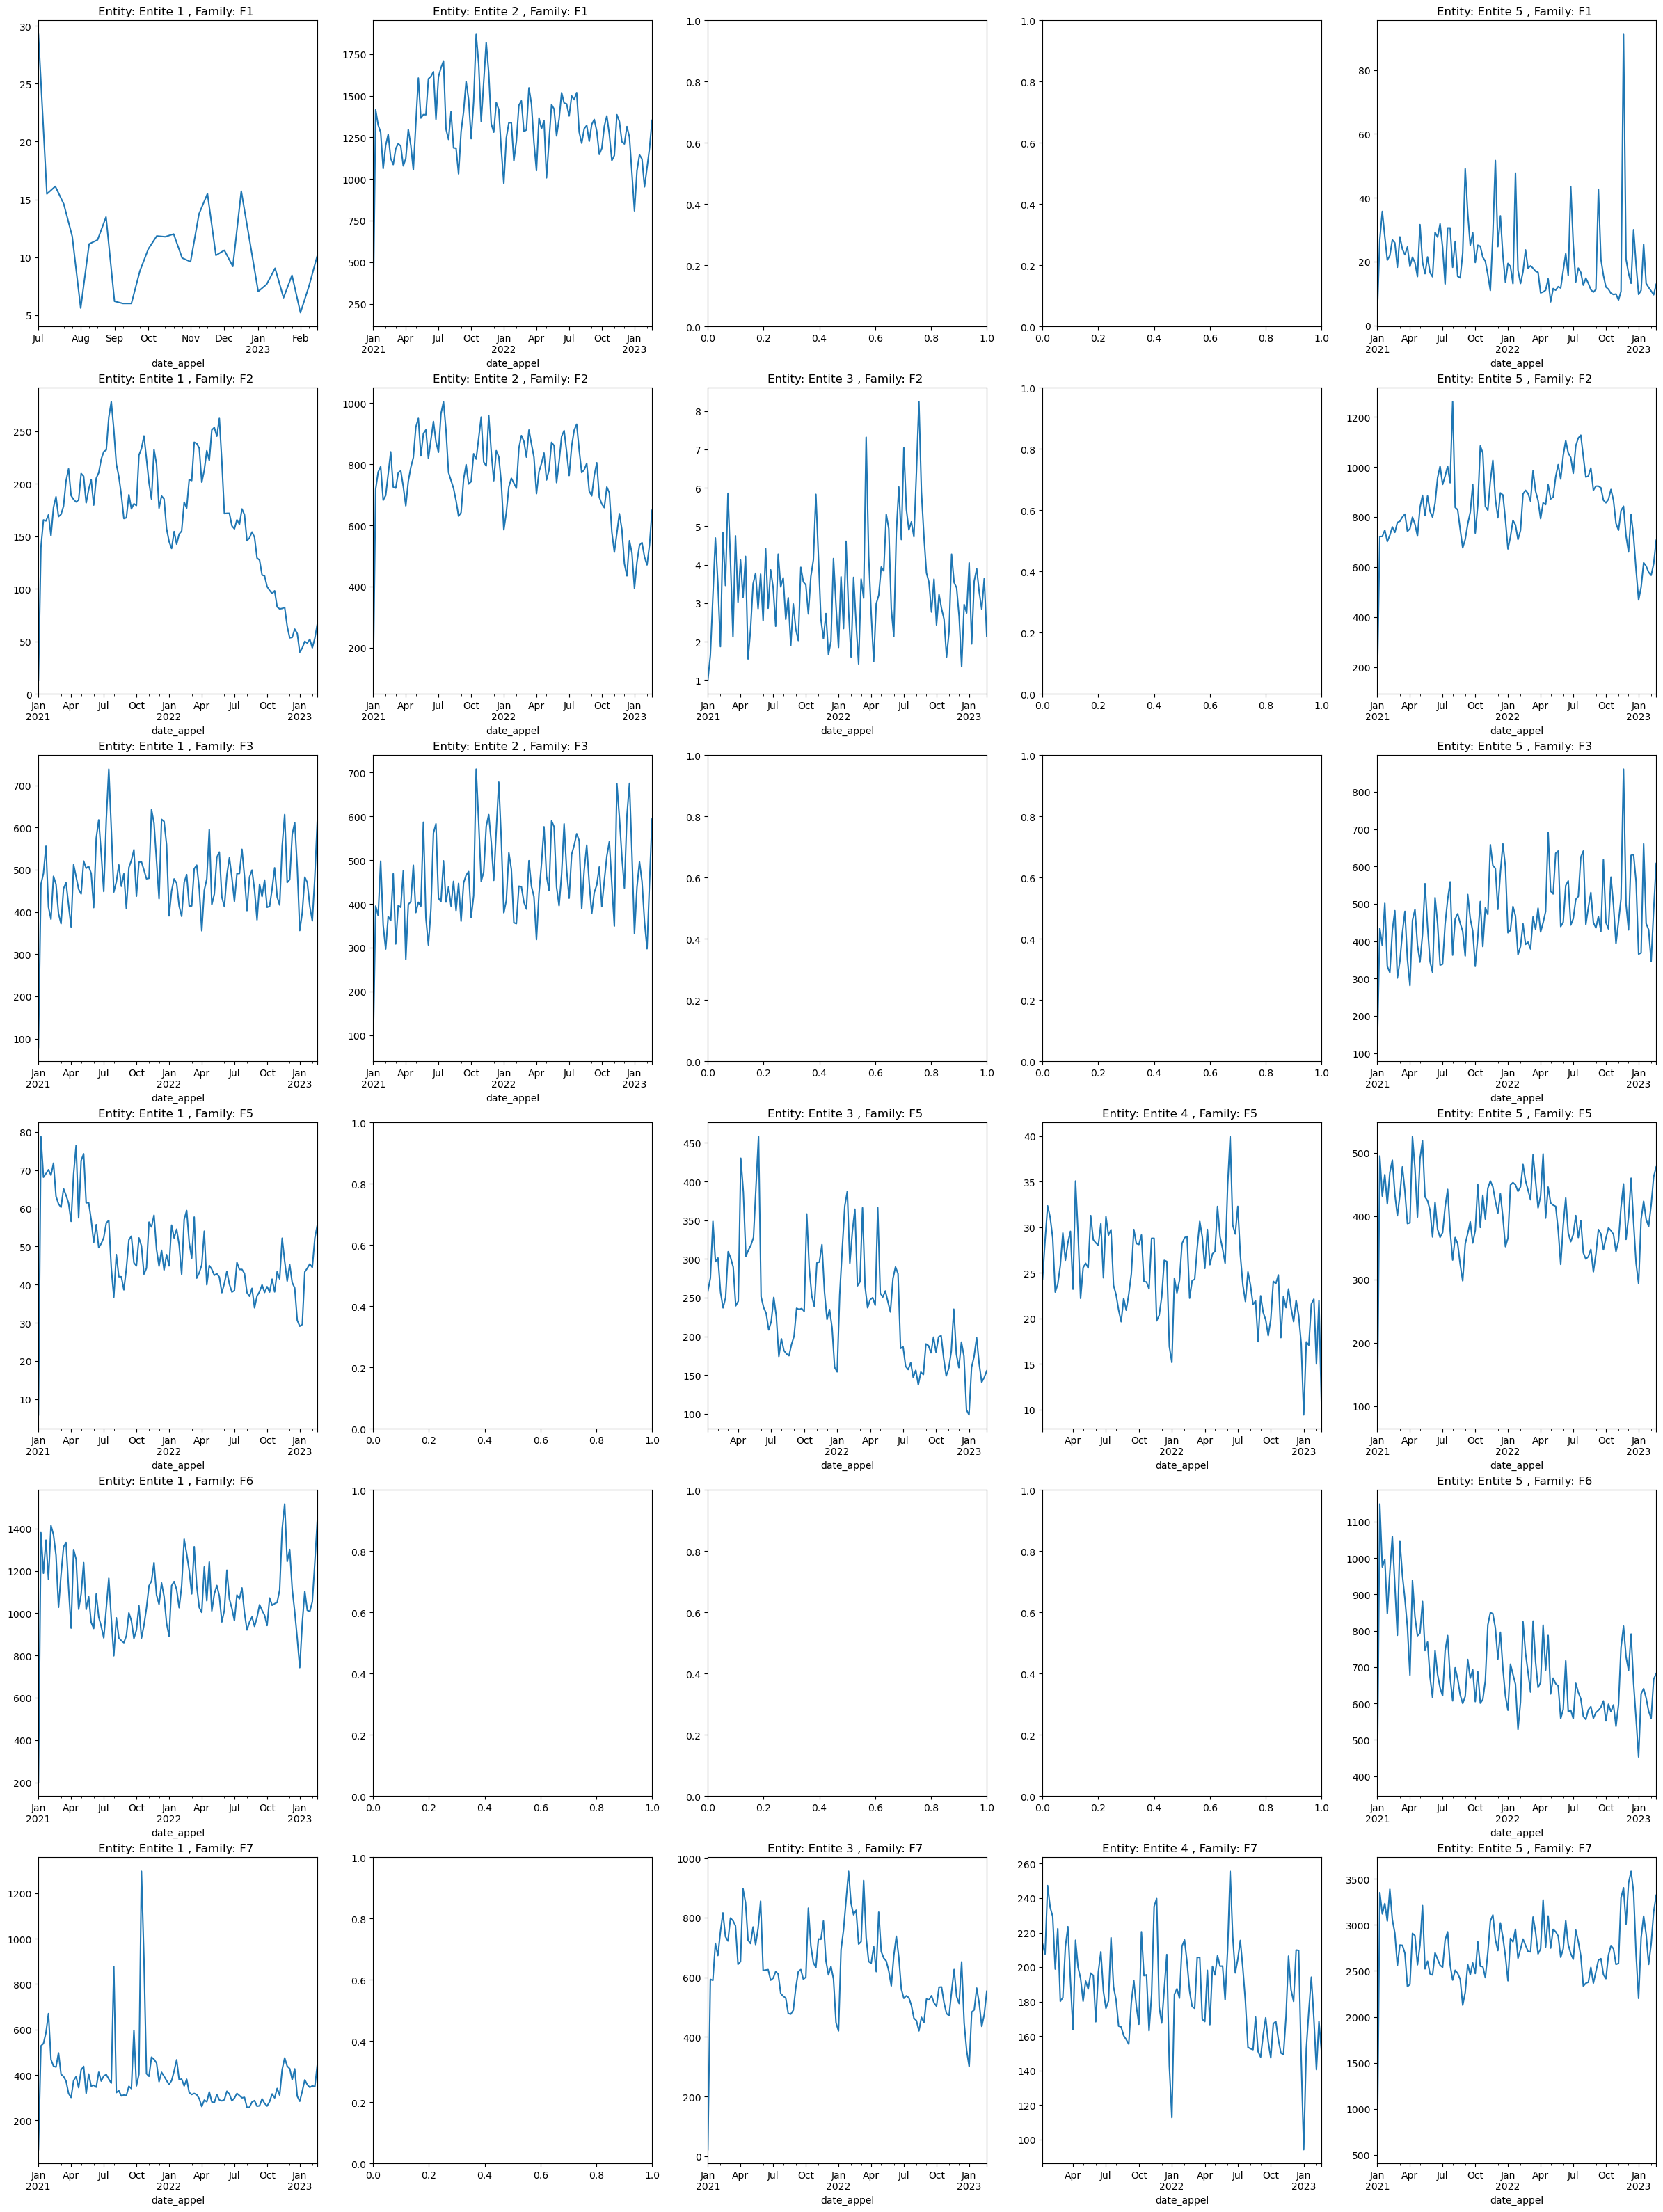

In [21]:
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0:  
            df['Nombre_entrants_corrige'].resample("W").mean().plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot


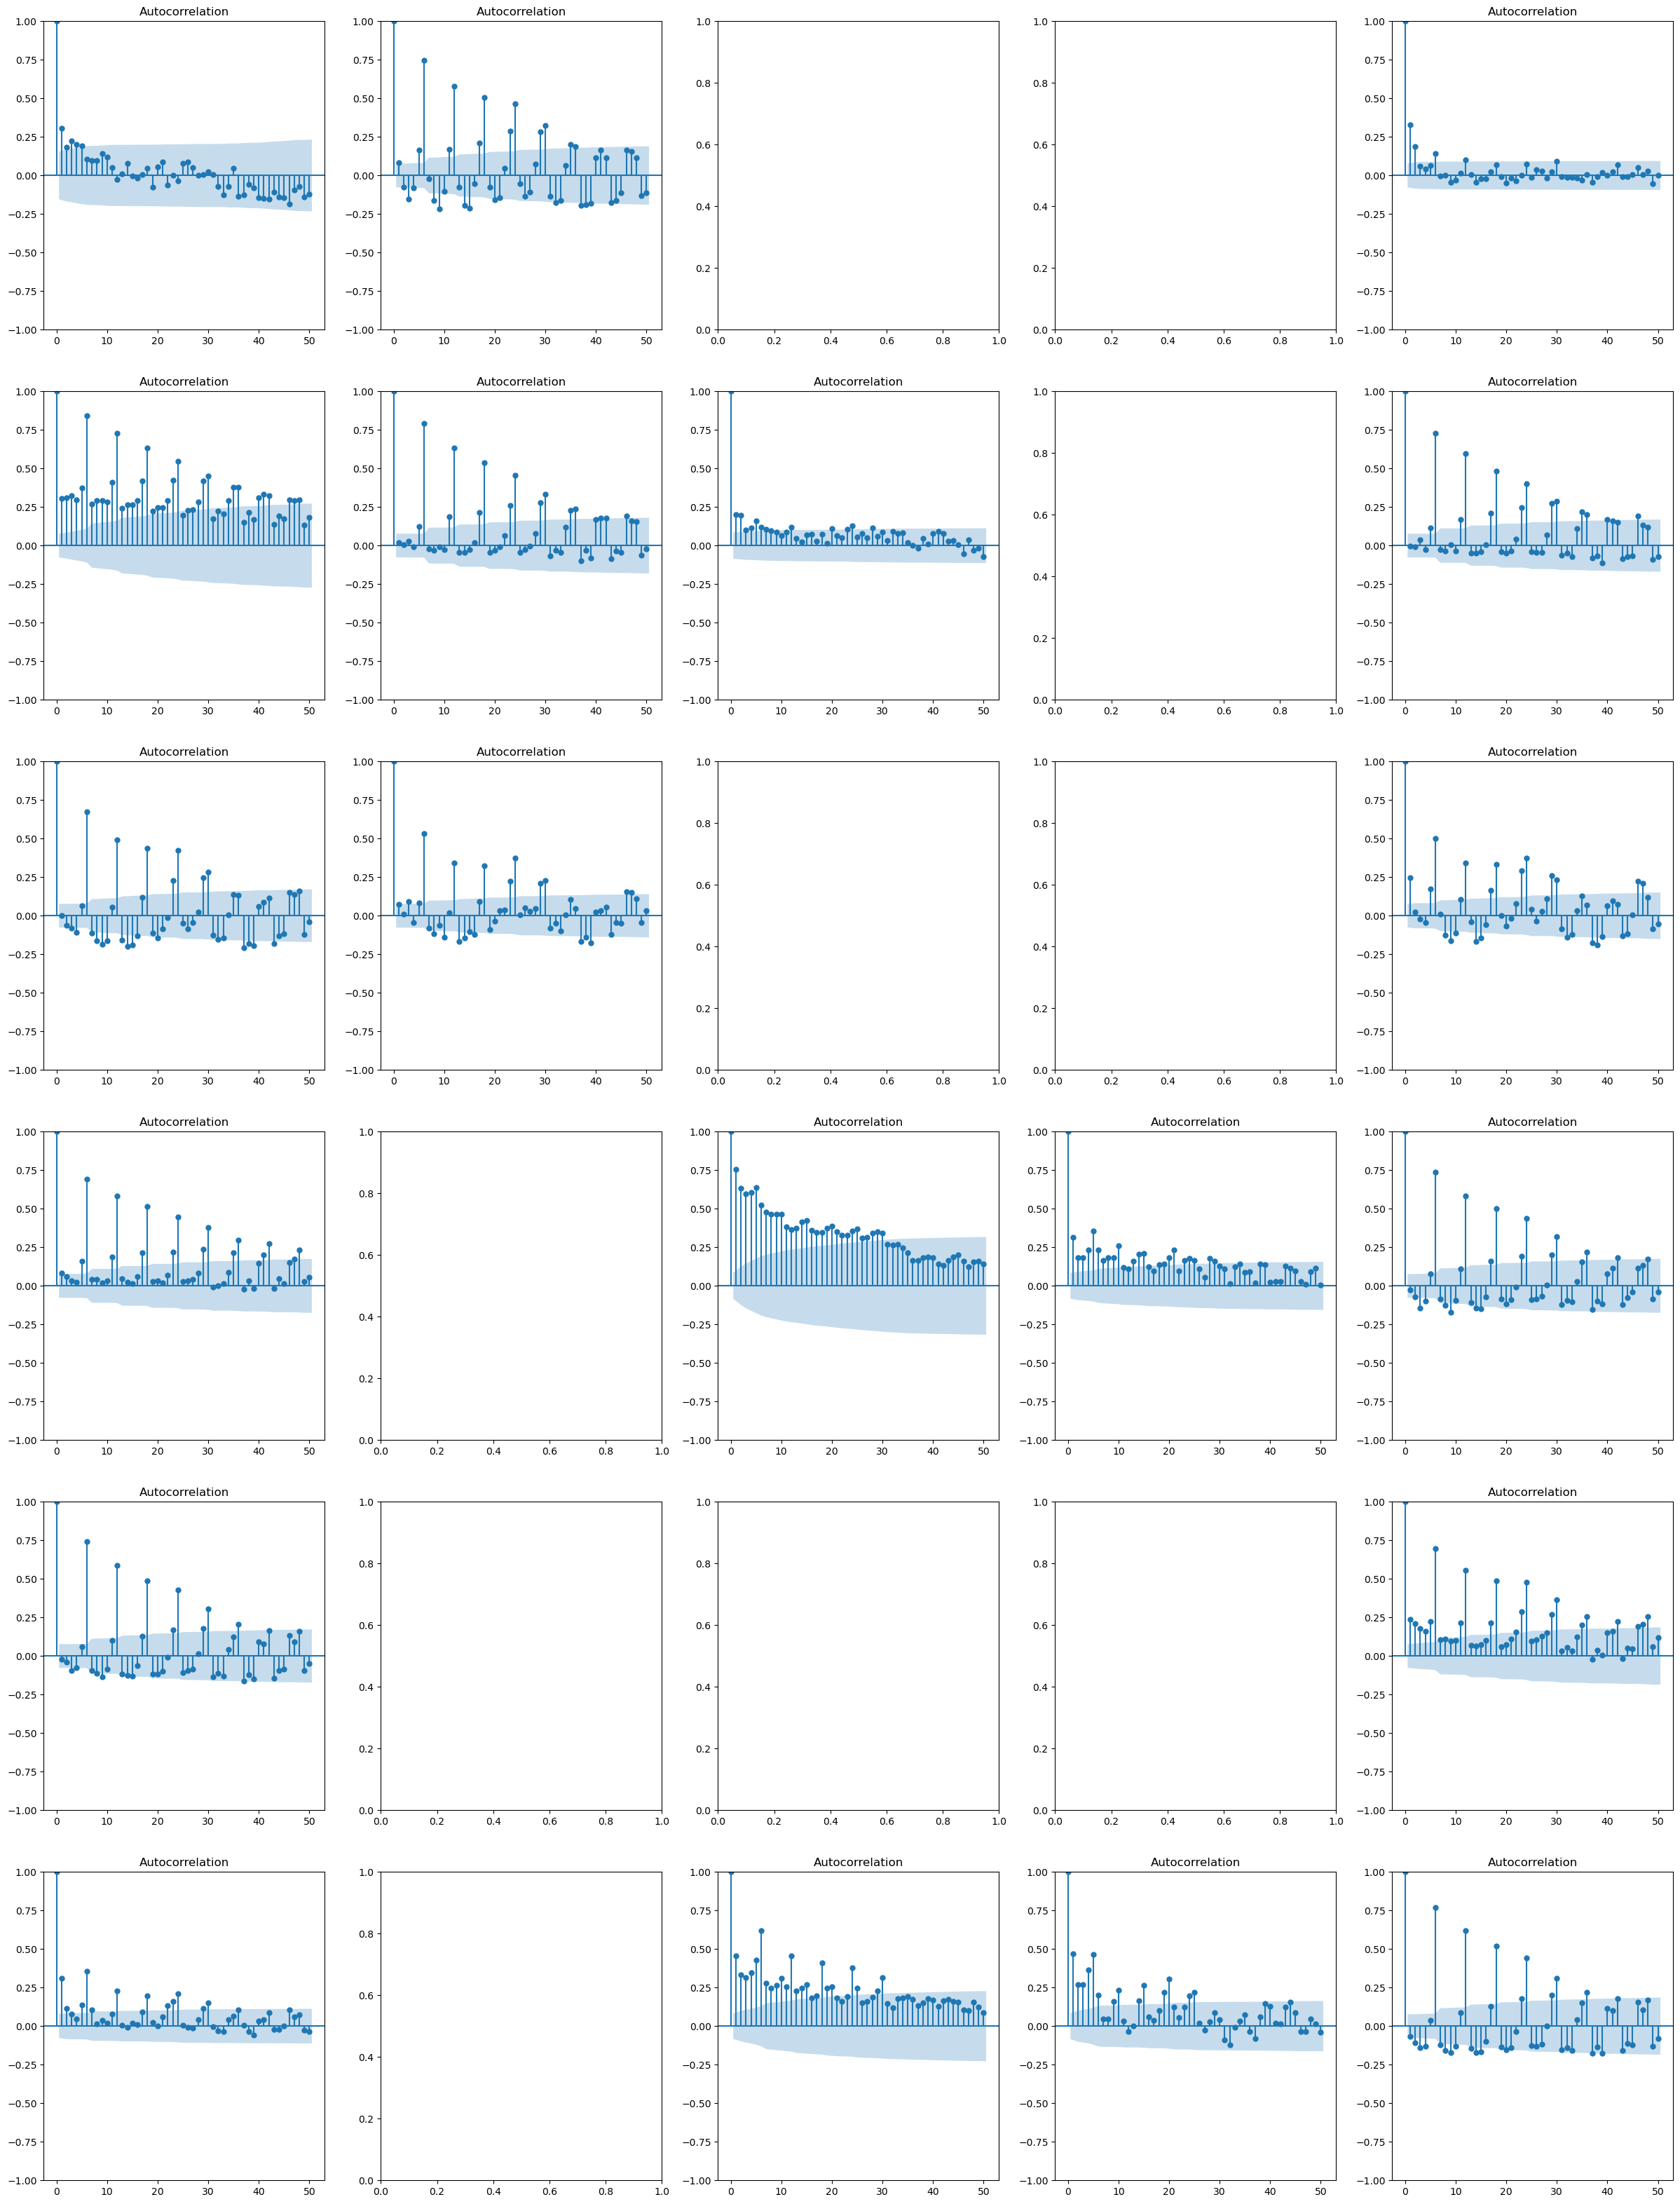

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 
            plot_acf(df.Nombre_entrants_corrige.tolist(), lags=50, ax=ax)

In [25]:
trend_list = [
{'Entite' : 'Entite 1', 'Famille':'F1','d':0 , 'trend':'None' },
{'Entite' : 'Entite 2', 'Famille':'F1','d':0 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F1','d':0 , 'trend':'None' },


{'Entite' : 'Entite 1', 'Famille':'F2','d':1 , 'trend':'descending' },
{'Entite' : 'Entite 2', 'Famille':'F2','d':0 , 'trend':'descending' }, # ACF
{'Entite' : 'Entite 3', 'Famille':'F2','d':0 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F2','d':0 , 'trend':'descending' }, # ACF

{'Entite' : 'Entite 1', 'Famille':'F3','d':0, 'trend':'n' }, # ACF
{'Entite' : 'Entite 2', 'Famille':'F3','d':0, 'trend':'n' }, # ACF
{'Entite' : 'Entite 5', 'Famille':'F3','d':0, 'trend':'n' }, # ACF

{'Entite' : 'Entite 1', 'Famille':'F5','d':0 , 'trend':'descending' },# ACF
{'Entite' : 'Entite 3', 'Famille':'F5','d':1 , 'trend':'descending' },
{'Entite' : 'Entite 4', 'Famille':'F5','d':1 , 'trend':'descending' },
{'Entite' : 'Entite 5', 'Famille':'F5','d':0 , 'trend':'descending' },# ACF

{'Entite' : 'Entite 1', 'Famille':'F6','d':0 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F6','d':1 , 'trend':'descending' },

{'Entite' : 'Entite 1', 'Famille':'F5','d':0 , 'trend':'descending' },
{'Entite' : 'Entite 3', 'Famille':'F5','d':1 , 'trend':'None' },
{'Entite' : 'Entite 4', 'Famille':'F5','d':1 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F5','d':0 , 'trend':'descending' },

]

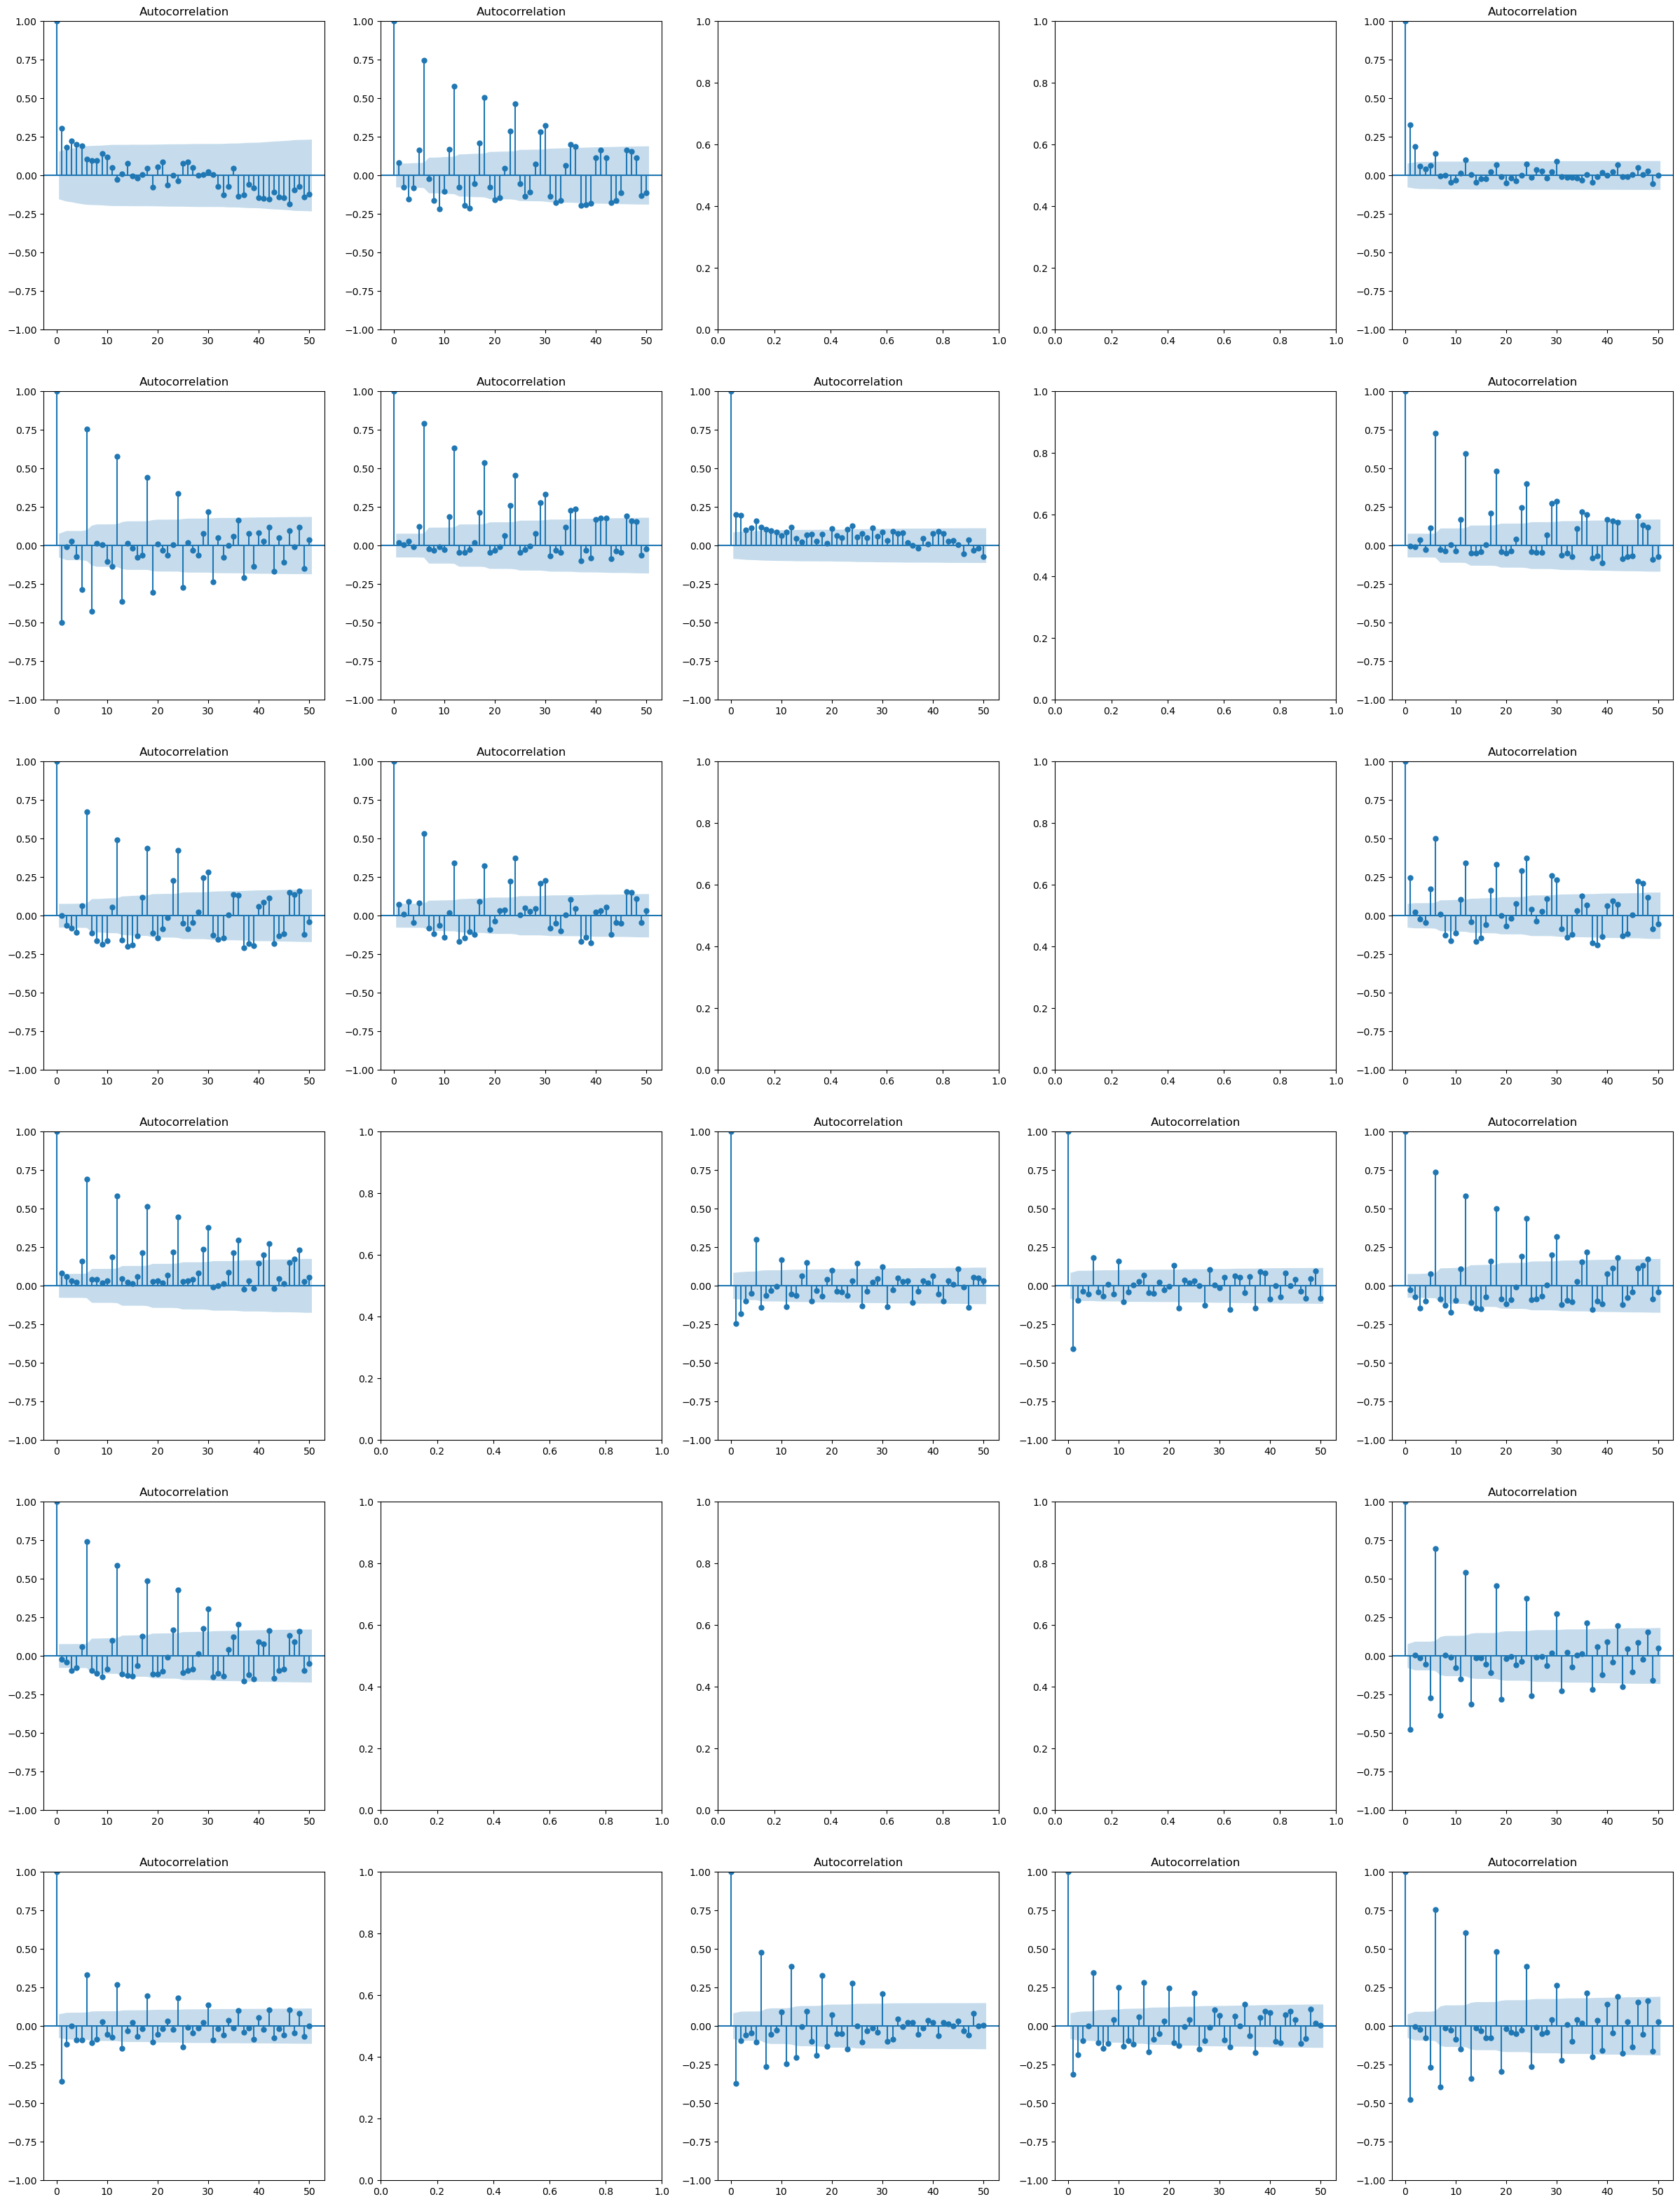

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 
        
            for dic in trend_list:
                if dic['Entite'] == entite and dic['Famille']== famille:
                    d = dic['d']

            
            if d > 0:
                plot_acf(df.Nombre_entrants_corrige.diff().dropna().tolist(), lags=50, ax=ax)
            else:    
                plot_acf(df.Nombre_entrants_corrige.tolist(), lags=50, ax=ax)

Parfait

In [44]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
df_trend = pd.DataFrame(columns = ['Entite', 'Famille','d','trend'])

for couple in trend_list:
    df_trend = df_trend.append(couple,ignore_index=True)

df_trend.to_csv('data/df_trend.csv', index =False)

In [55]:
df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()



# Creating subplots for entities
df_trend_diff = pd.DataFrame(columns = ['Entite', 'Famille','Nombre_entrants_corrige'])


for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 
        
            for dic in trend_list:
                if dic['Entite'] == entite and dic['Famille']== famille:
                    d = dic['d']
        
            if d > 0:
                df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.diff().dropna()
            
            df_trend_diff = pd.concat([df_trend_diff,df])


df_trend_diff = df_trend_diff.sort_values(['Entite','Famille'],ascending = True)
df_trend_diff = df_trend_diff.reset_index(names="date_appel")
df_trend_diff.to_csv('data/df_trend_diff.csv', index =False)

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_47186/921737704.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.diff().dropna()
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_47186/921737704.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.diff().dropna()
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_47186/921737704.py:23: SettingWithCopyWarning: 
A val

# Saisonnalité

On va rechercher les séries qui présentent une saisonalité hebdomadaire.
Deux techniques:
- on affiche les deux derniers mois
- on affiche les box 

Avant cela on va ajouter les dimanches et les jours ferriés au data set

In [59]:
df_tel = pd.read_csv('data/df_trend_diff.csv', index_col="date_appel", parse_dates = True)

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

df_freq = pd.DataFrame(columns = ['Entite', 'Famille','Nombre_entrants_corrige'])

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        df = df.asfreq('d')
        df.Entite = df.Entite.fillna(entite)
        df.Famille = df.Famille.fillna(famille)
        df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(0)
        df_freq = pd.concat([df_freq,df])

df_freq = df_freq.sort_values(['Entite','Famille'],ascending = True)
df_freq = df_freq.reset_index(names="date_appel")
df_freq.to_csv('data/df_trend_diff_freq.csv', index = False)

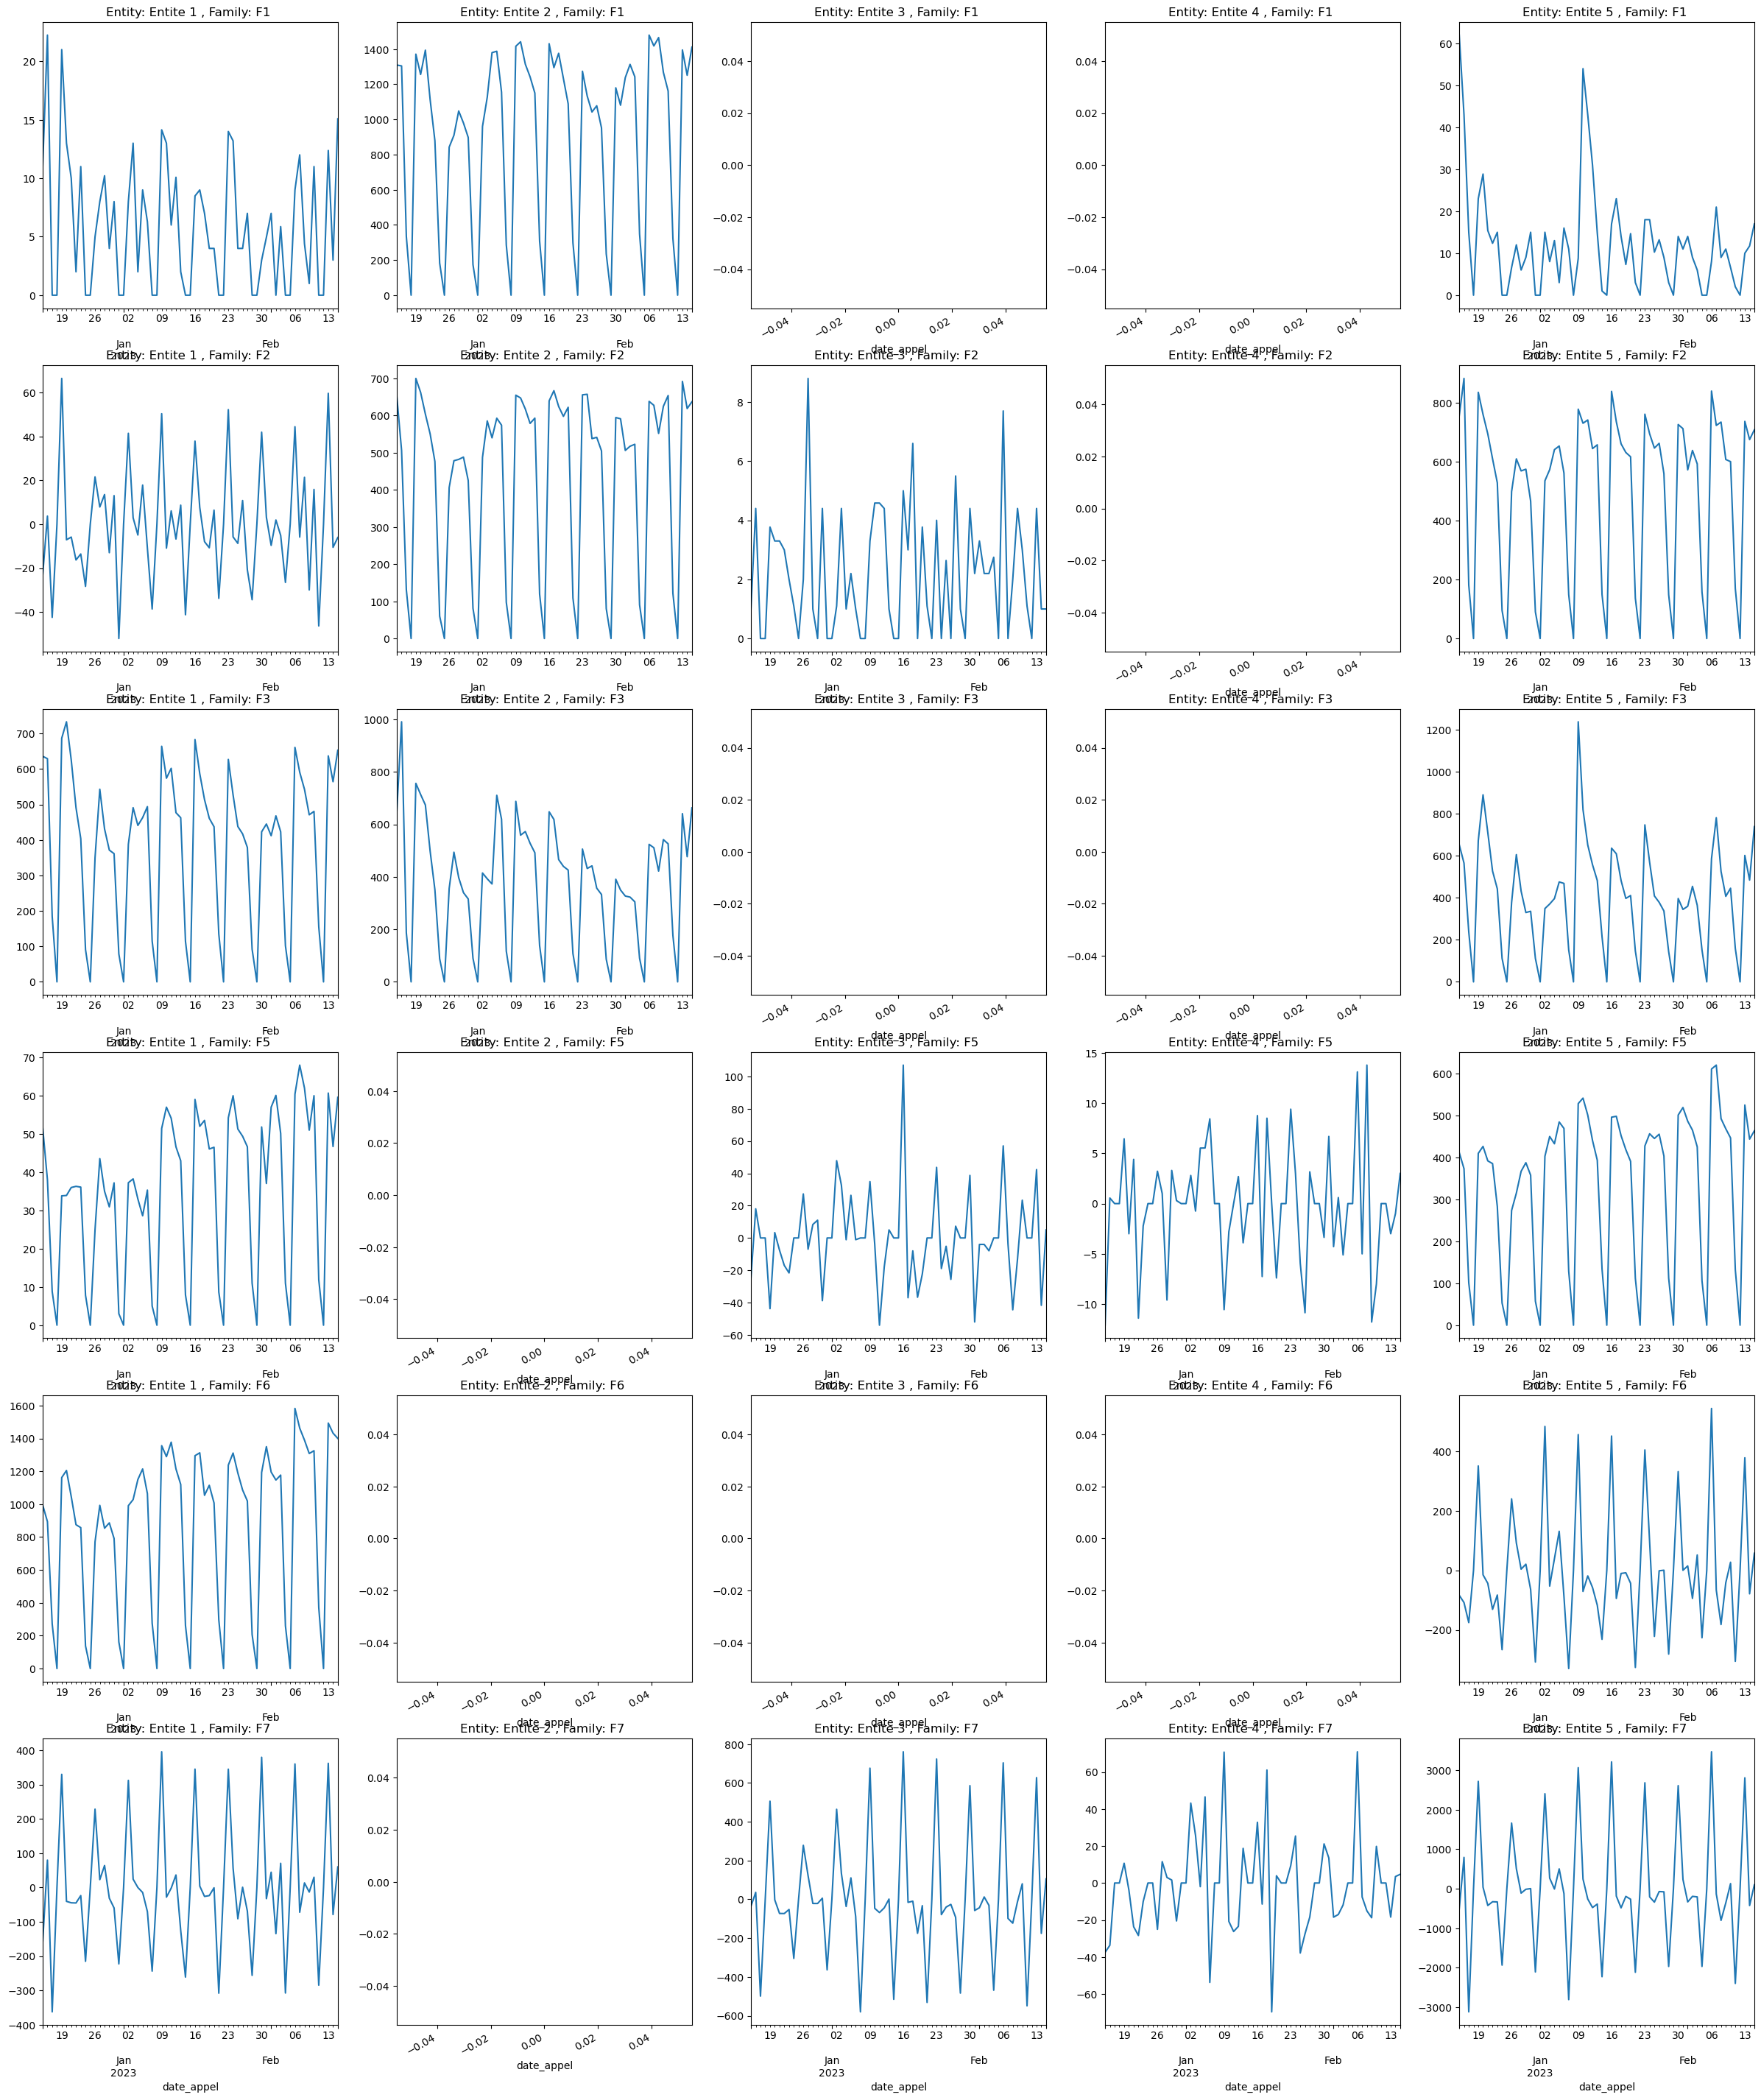

In [60]:
df_tel = pd.read_csv('data/df_trend_diff_freq.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.loc[ "2022-12-15":,:]

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        df['Nombre_entrants_corrige'].plot(ax=ax)
        ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot


Mise à part pour la Famille 1, Entité 1 et 5, la saisonnalité hebdommadaire est évidente

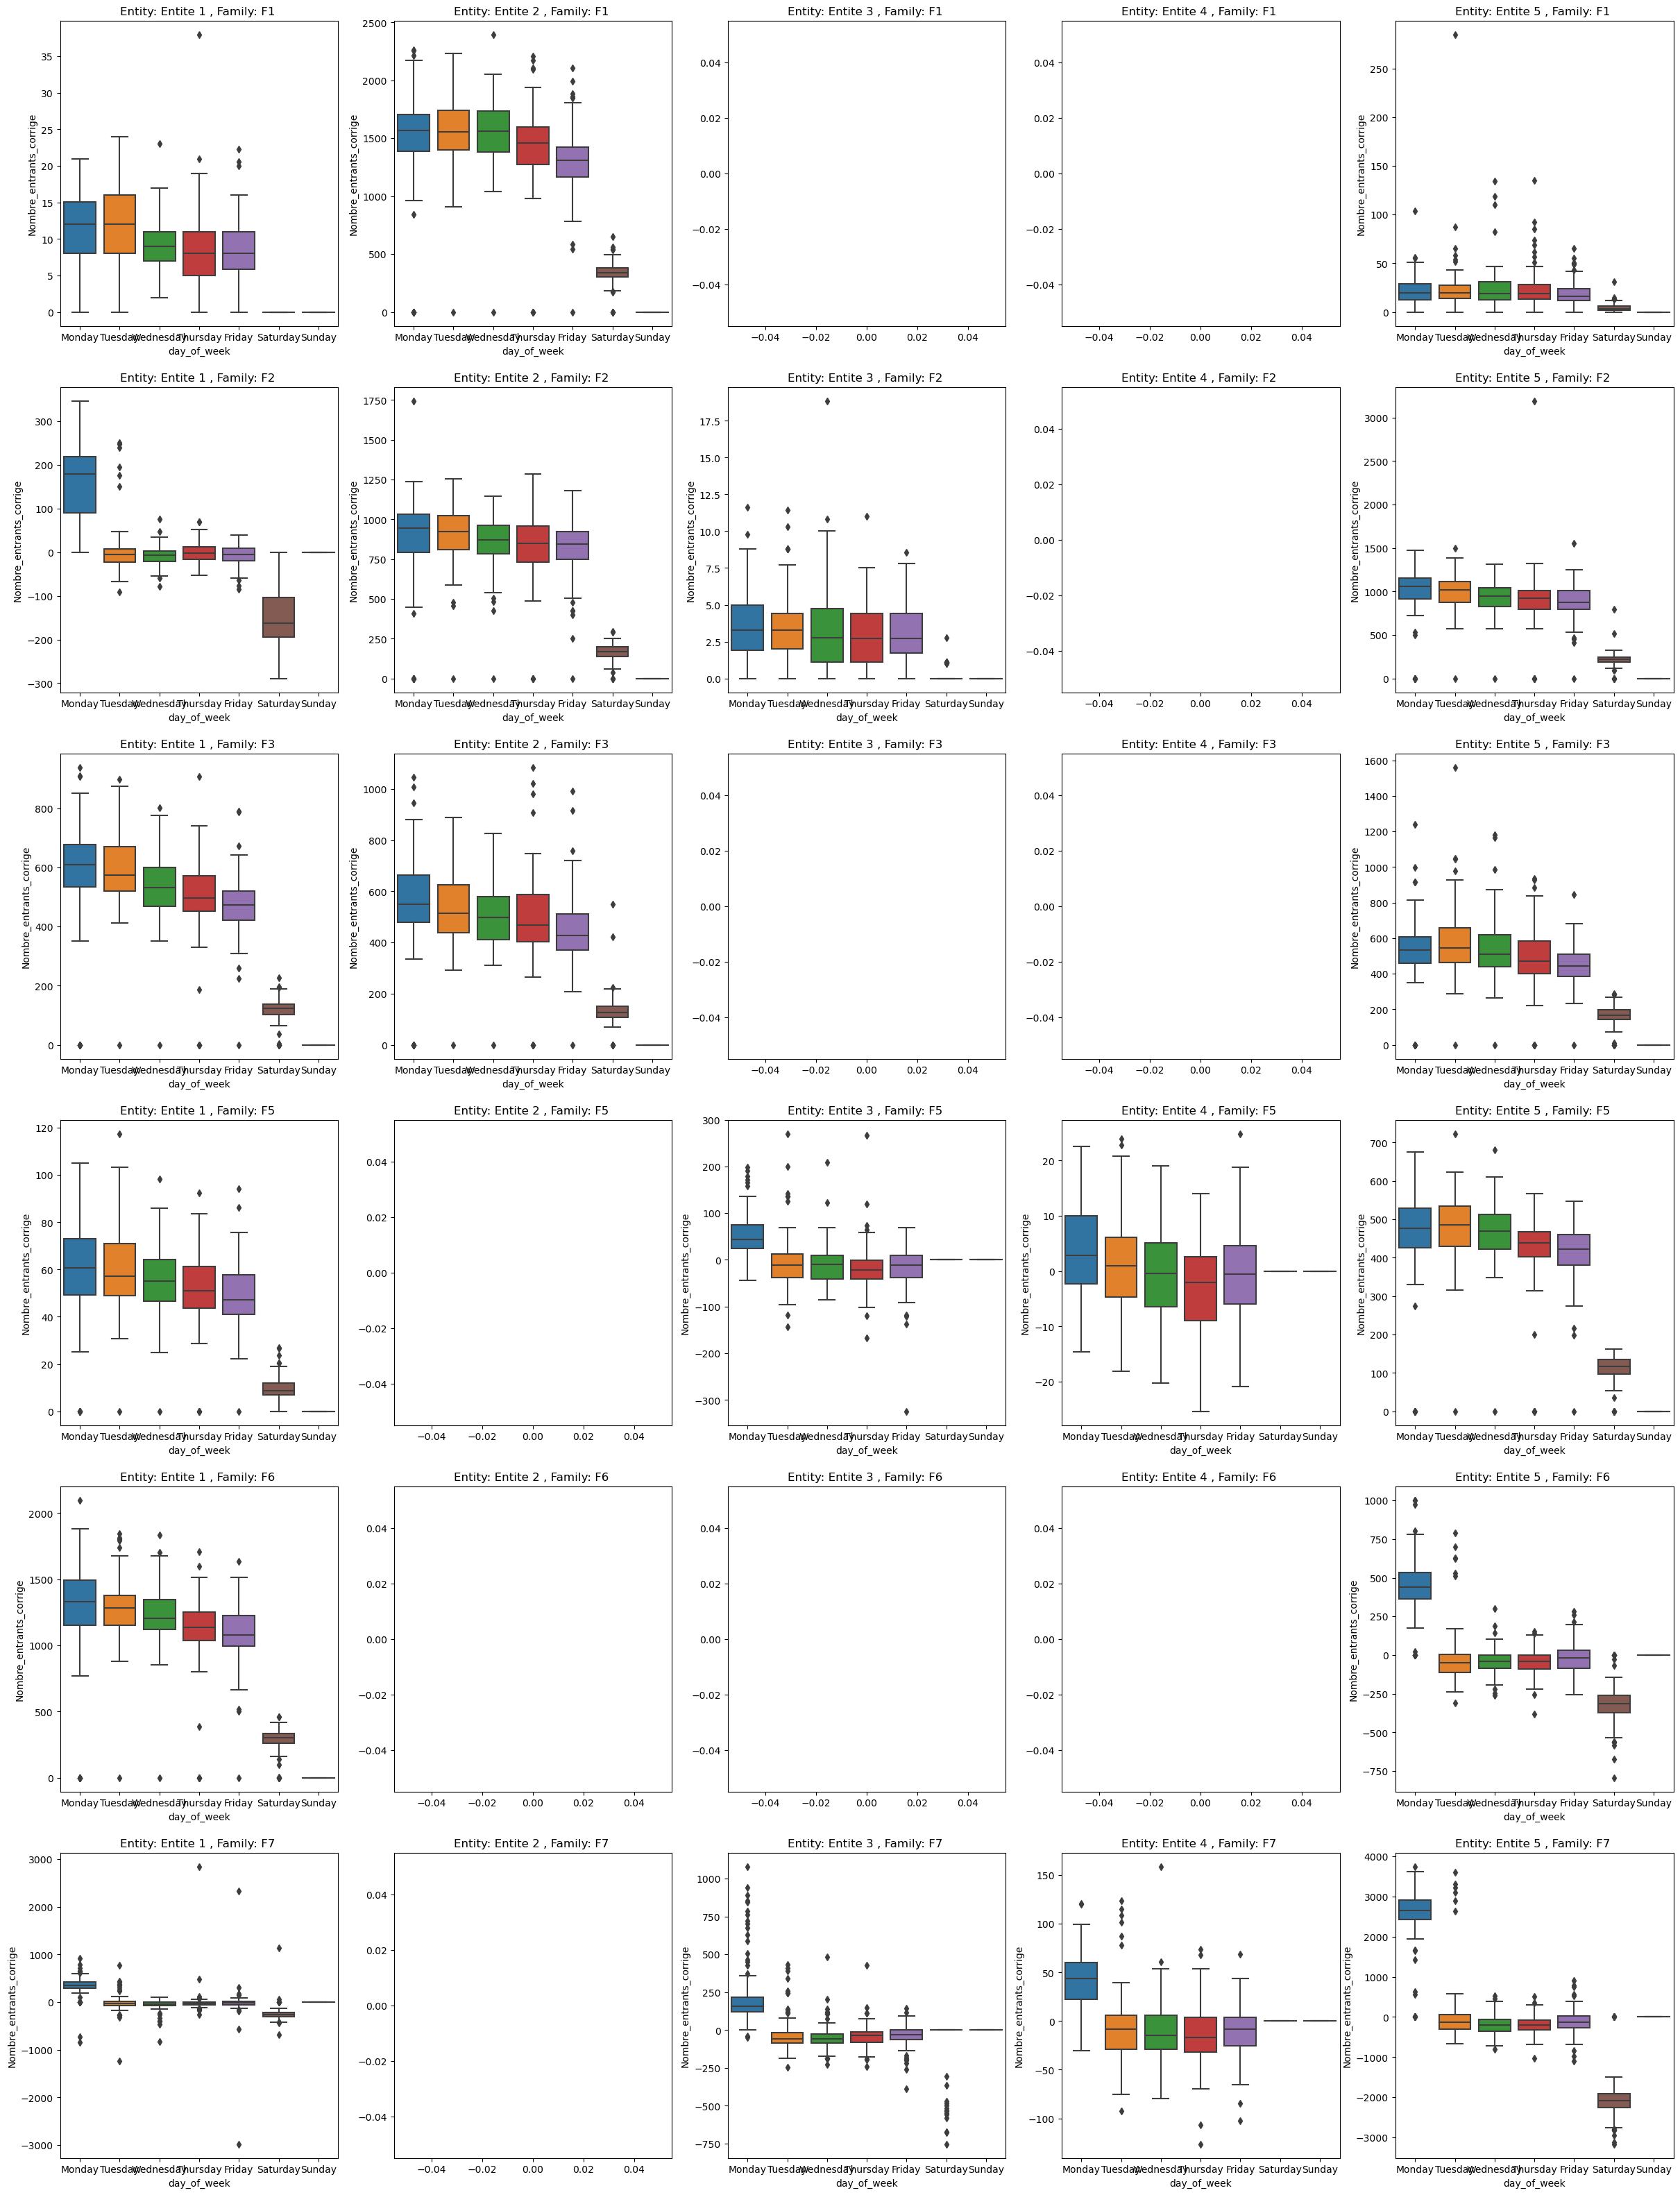

In [63]:
df_tel = pd.read_csv('data/df_trend_diff_freq.csv', index_col="date_appel", parse_dates = True)

df_tel.reset_index(inplace=True)

# Prepare data
df_tel['day_of_week'] = df_tel.date_appel.dt.day_name()
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0:  
            sns.boxplot(x='day_of_week', y='Nombre_entrants_corrige', data=df,ax=ax,order=weekday_order)

        # Set Title
            ax.set_title(f"Entity: {entite} , Family: {famille} ")
        
        
        else:
            df['Nombre_entrants_corrige'].plot(ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot
            

plt.show()

In [76]:
df_tel = pd.read_csv('data/df_trend_diff_freq.csv', index_col="date_appel", parse_dates = True)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()



# Creating subplots for entities
df_saison_diff = pd.DataFrame(columns = ['Entite', 'Famille','Nombre_entrants_corrige'])


for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 
        

            df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.diff(7).dropna()
            
            df_saison_diff = pd.concat([df_saison_diff,df])


df_saison_diff = df_saison_diff.sort_values(['Entite','Famille'],ascending = True)
df_saison_diff = df_saison_diff.reset_index(names="date_appel")
df_saison_diff = df_saison_diff.dropna()
df_saison_diff.to_csv('data/df_saison_diff.csv', index =False)


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_47186/1695188241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.diff(7).dropna()
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_47186/1695188241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.diff(7).dropna()
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_47186/1695188241.py:19: SettingWithCopyWarning: 


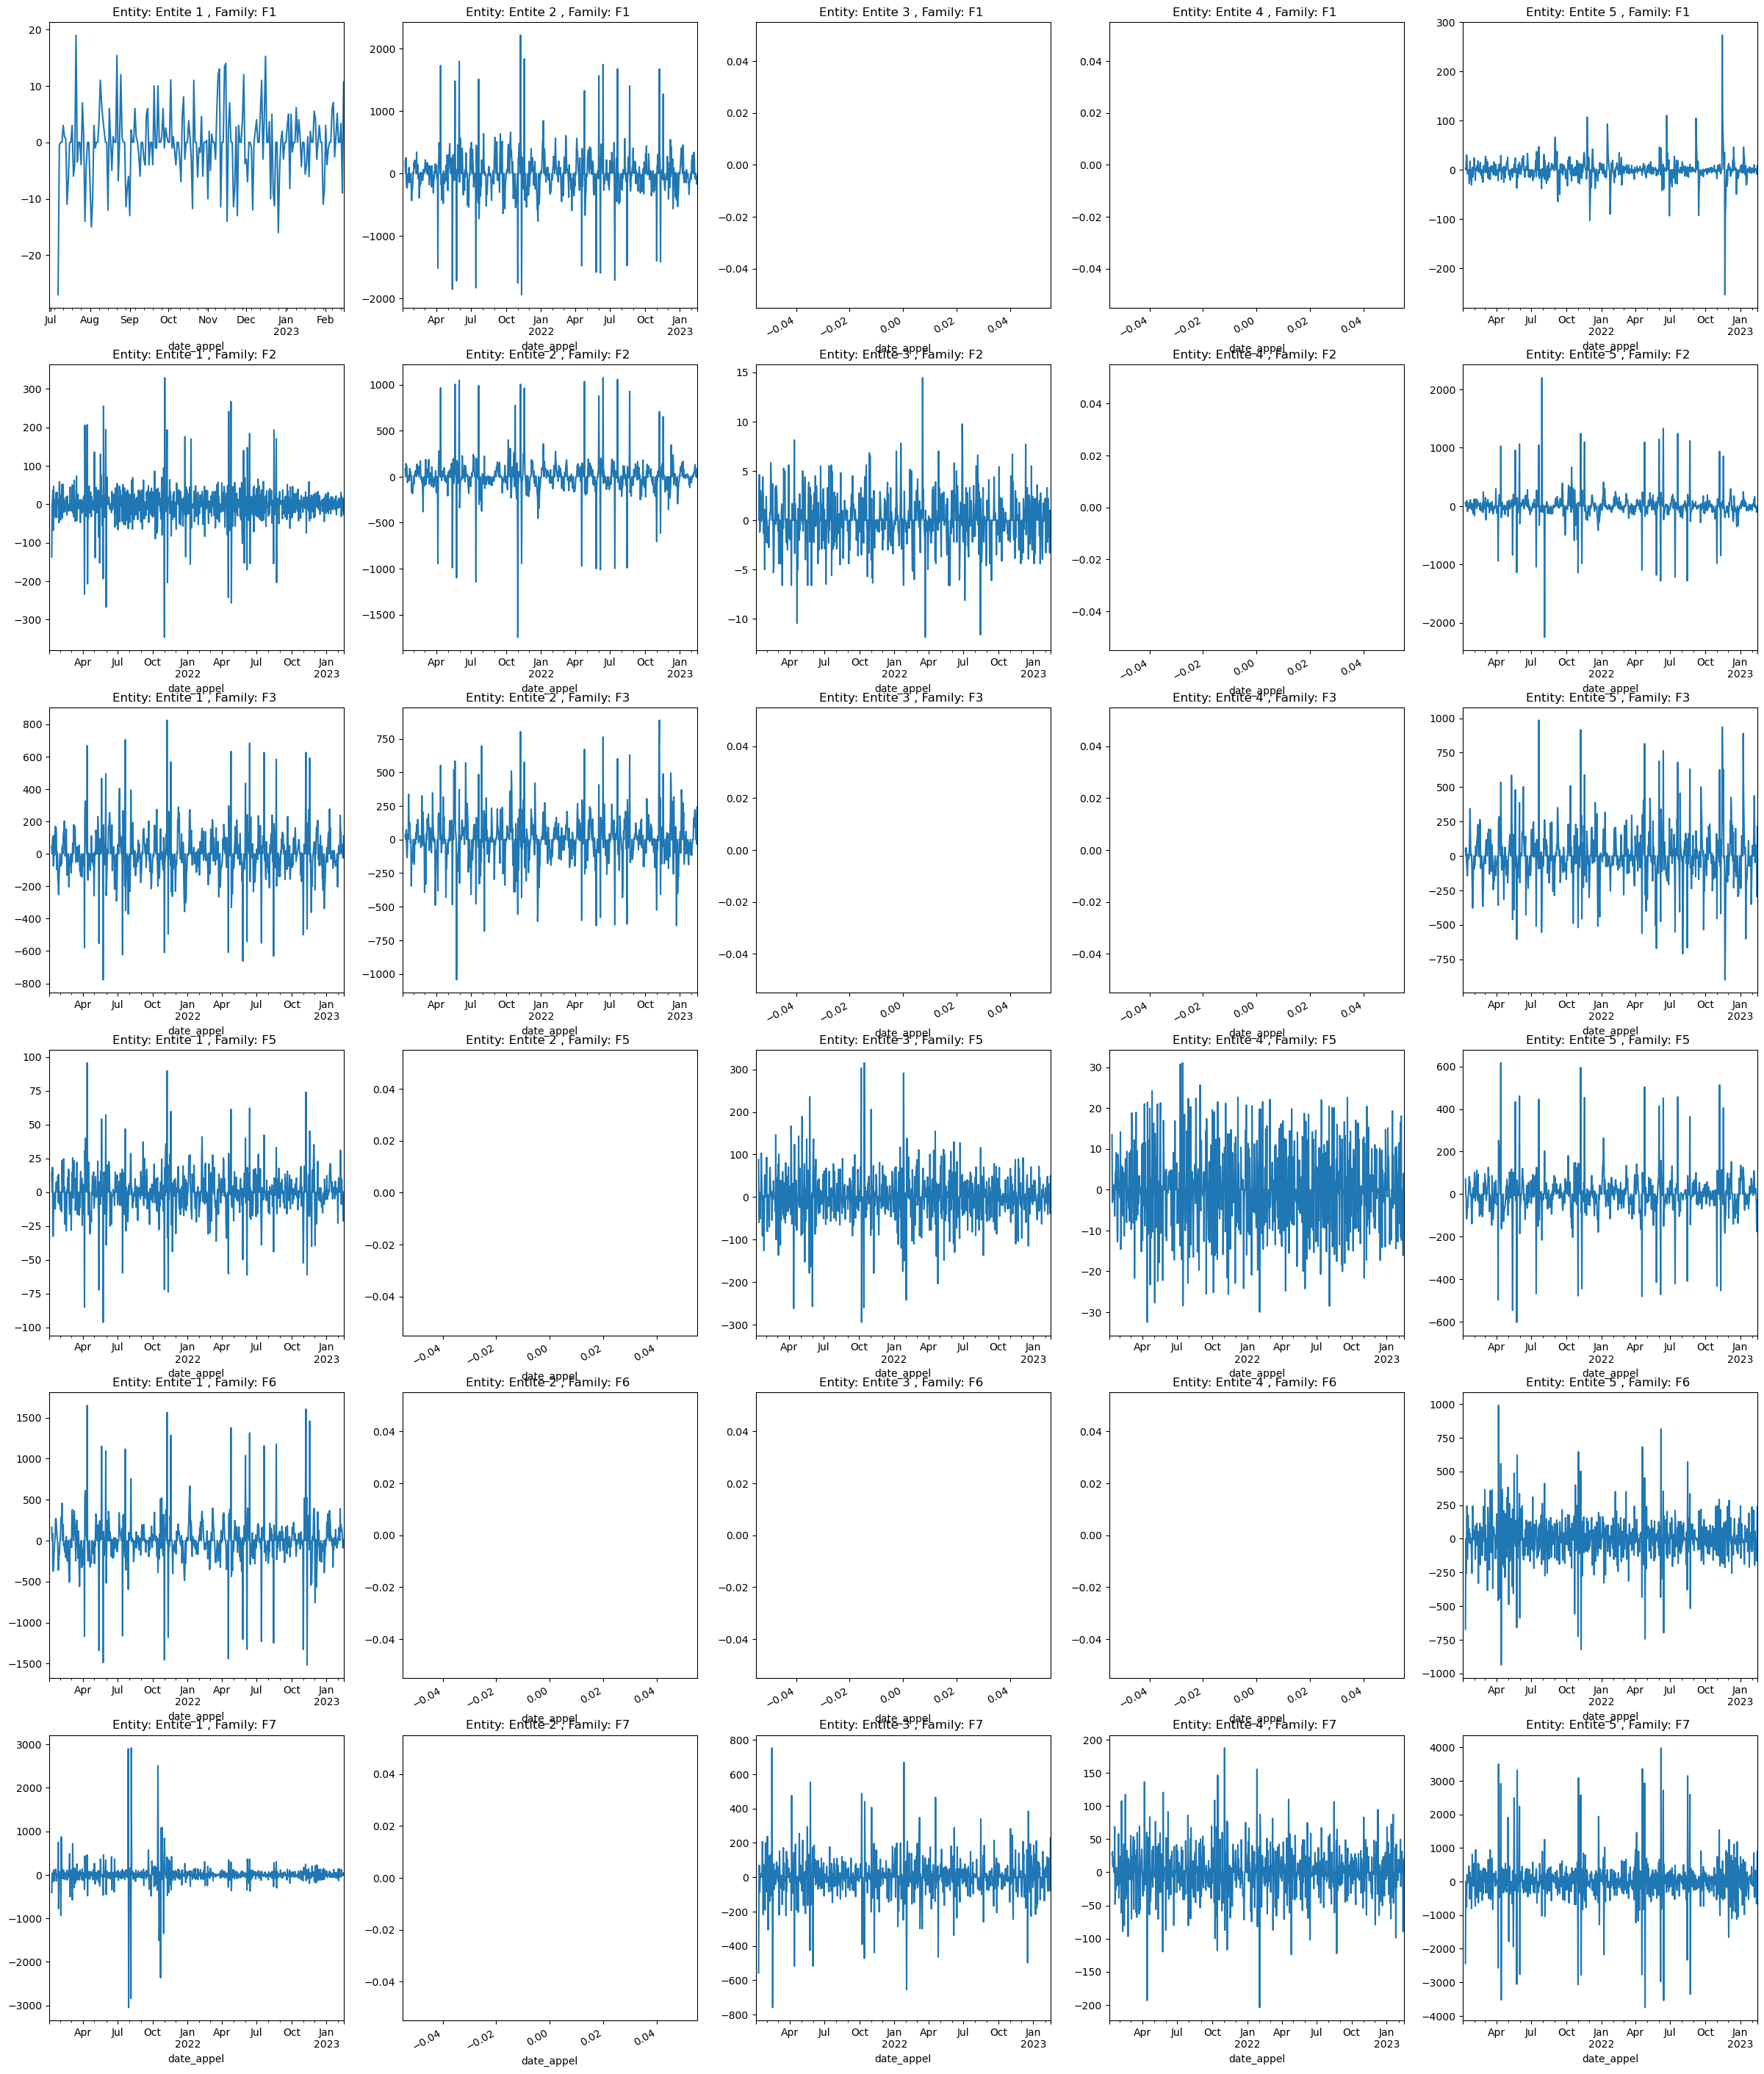

In [65]:
df_tel = pd.read_csv('data/df_saison_diff.csv', index_col="date_appel", parse_dates = True)

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        df['Nombre_entrants_corrige'].plot(ax=ax)
        ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot


# Paramètre AR

/usr/local/Caskroom/miniconda/base/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


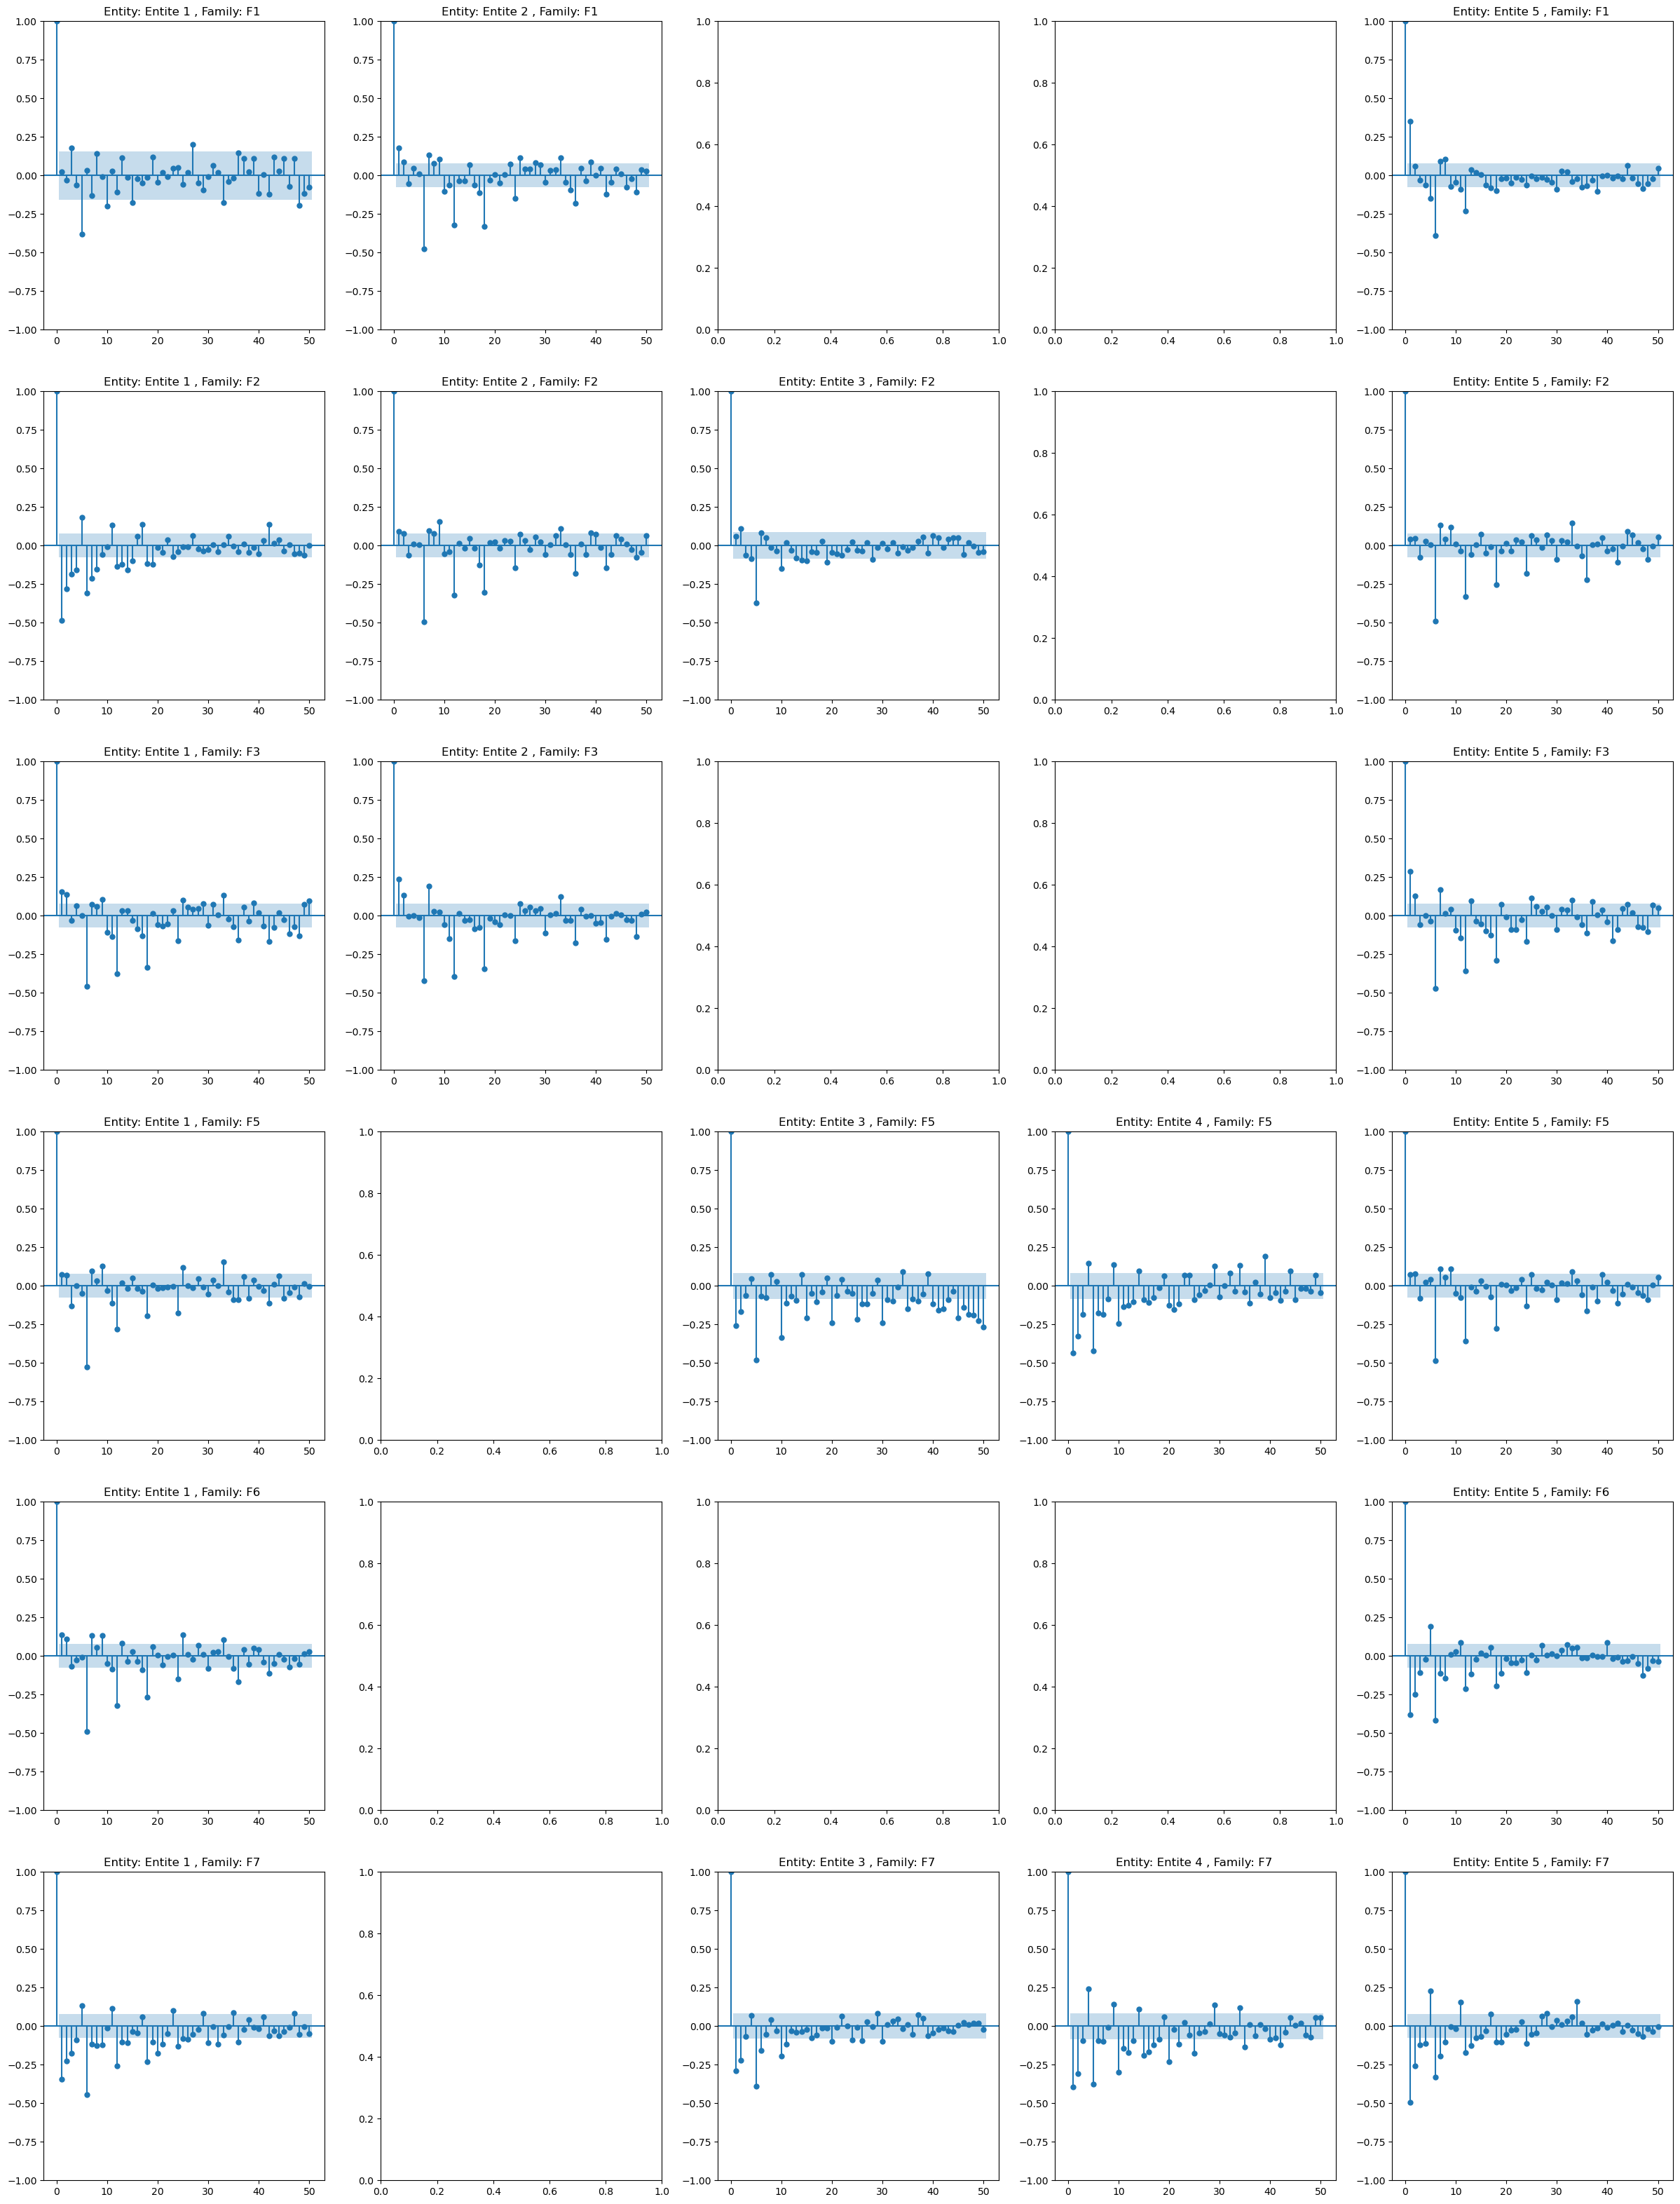

In [5]:
df_tel = pd.read_csv('data/df_saison_diff.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.dropna()
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 

            plot_pacf(df.Nombre_entrants_corrige.tolist(), lags=50, ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot

In [ ]:
ar_list = [
{'Entite' : 'Entite 1', 'Famille':'F1','d':0 },
{'Entite' : 'Entite 2', 'Famille':'F1','d':0  },
{'Entite' : 'Entite 5', 'Famille':'F1','d':0 , 'trend':'None' },


{'Entite' : 'Entite 1', 'Famille':'F2','d':1 , 'trend':'descending' },
{'Entite' : 'Entite 2', 'Famille':'F2','d':0 , 'trend':'descending' }, # ACF
{'Entite' : 'Entite 3', 'Famille':'F2','d':0 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F2','d':0 , 'trend':'descending' }, # ACF

{'Entite' : 'Entite 1', 'Famille':'F3','d':0, 'trend':'n' }, # ACF
{'Entite' : 'Entite 2', 'Famille':'F3','d':0, 'trend':'n' }, # ACF
{'Entite' : 'Entite 5', 'Famille':'F3','d':0, 'trend':'n' }, # ACF

{'Entite' : 'Entite 1', 'Famille':'F5','d':0 , 'trend':'descending' },# ACF
{'Entite' : 'Entite 3', 'Famille':'F5','d':1 , 'trend':'descending' },
{'Entite' : 'Entite 4', 'Famille':'F5','d':1 , 'trend':'descending' },
{'Entite' : 'Entite 5', 'Famille':'F5','d':0 , 'trend':'descending' },# ACF

{'Entite' : 'Entite 1', 'Famille':'F6','d':0 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F6','d':1 , 'trend':'descending' },

{'Entite' : 'Entite 1', 'Famille':'F5','d':0 , 'trend':'descending' },
{'Entite' : 'Entite 3', 'Famille':'F5','d':1 , 'trend':'None' },
{'Entite' : 'Entite 4', 'Famille':'F5','d':1 , 'trend':'None' },
{'Entite' : 'Entite 5', 'Famille':'F5','d':0 , 'trend':'descending' },

]

## Paramètre MA

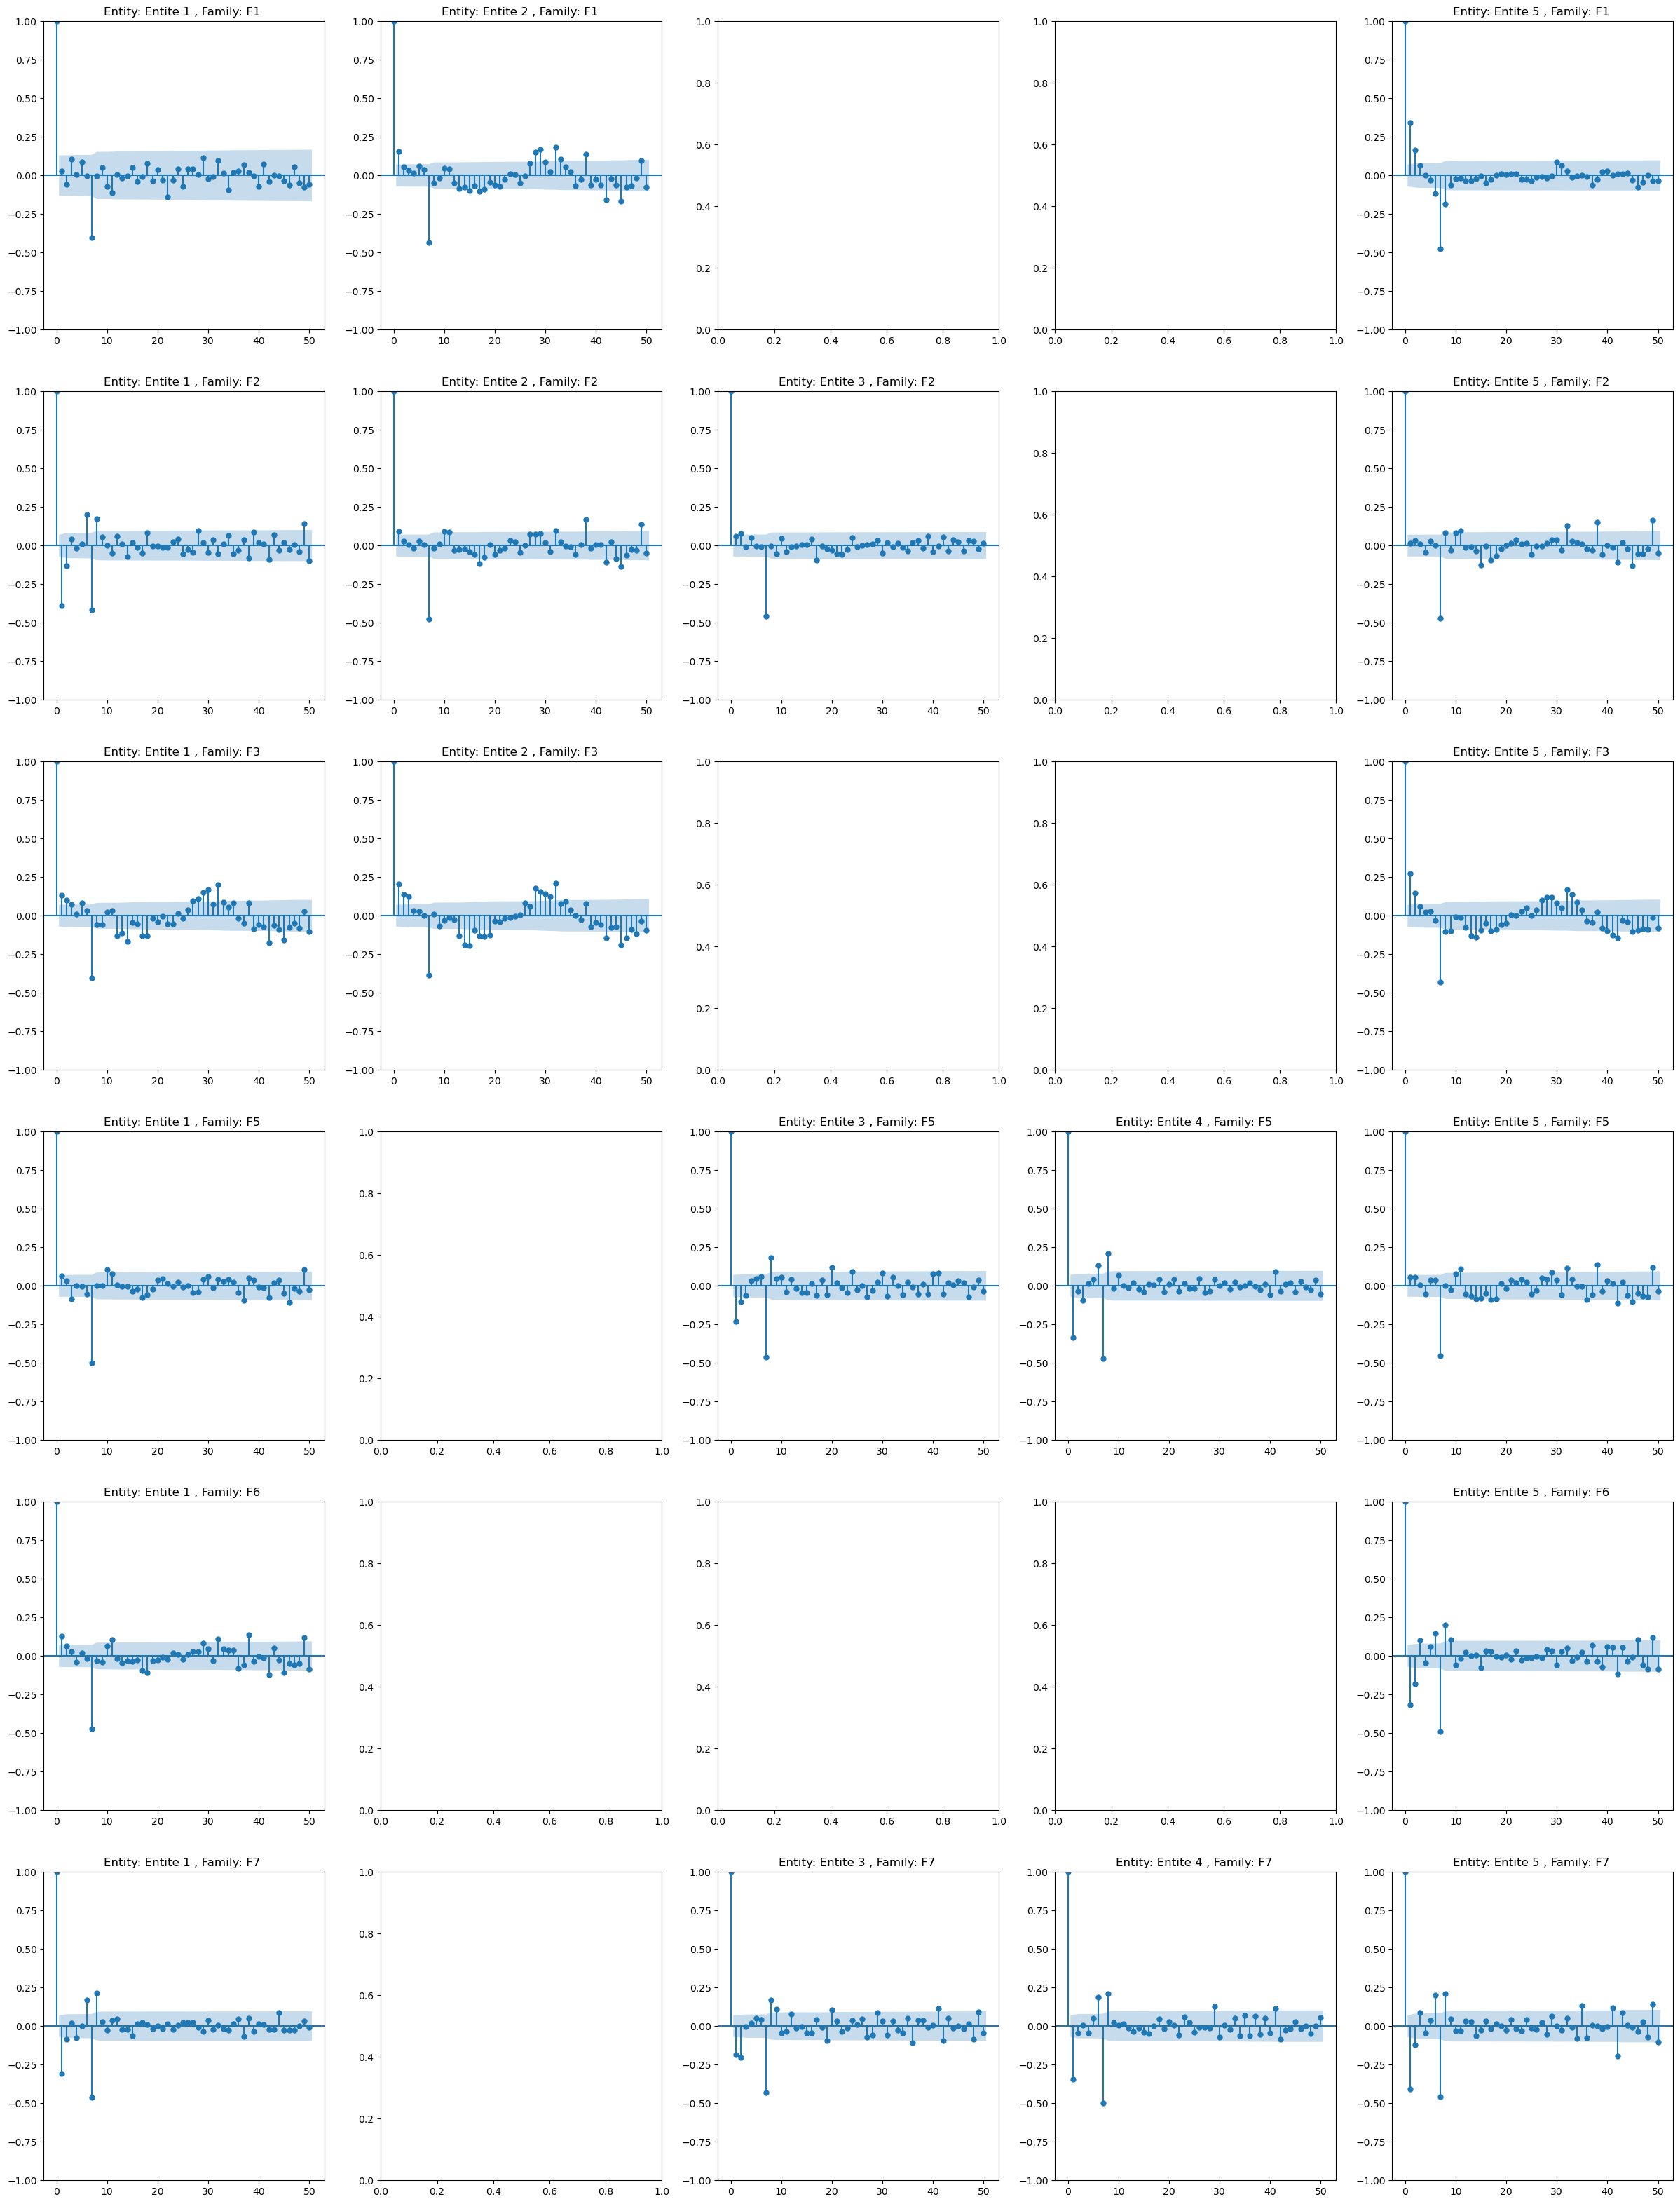

In [6]:
df_tel = pd.read_csv('data/df_saison_diff.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.dropna()
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 

            plot_acf(df.Nombre_entrants_corrige.tolist(), lags=50, ax=ax)
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot

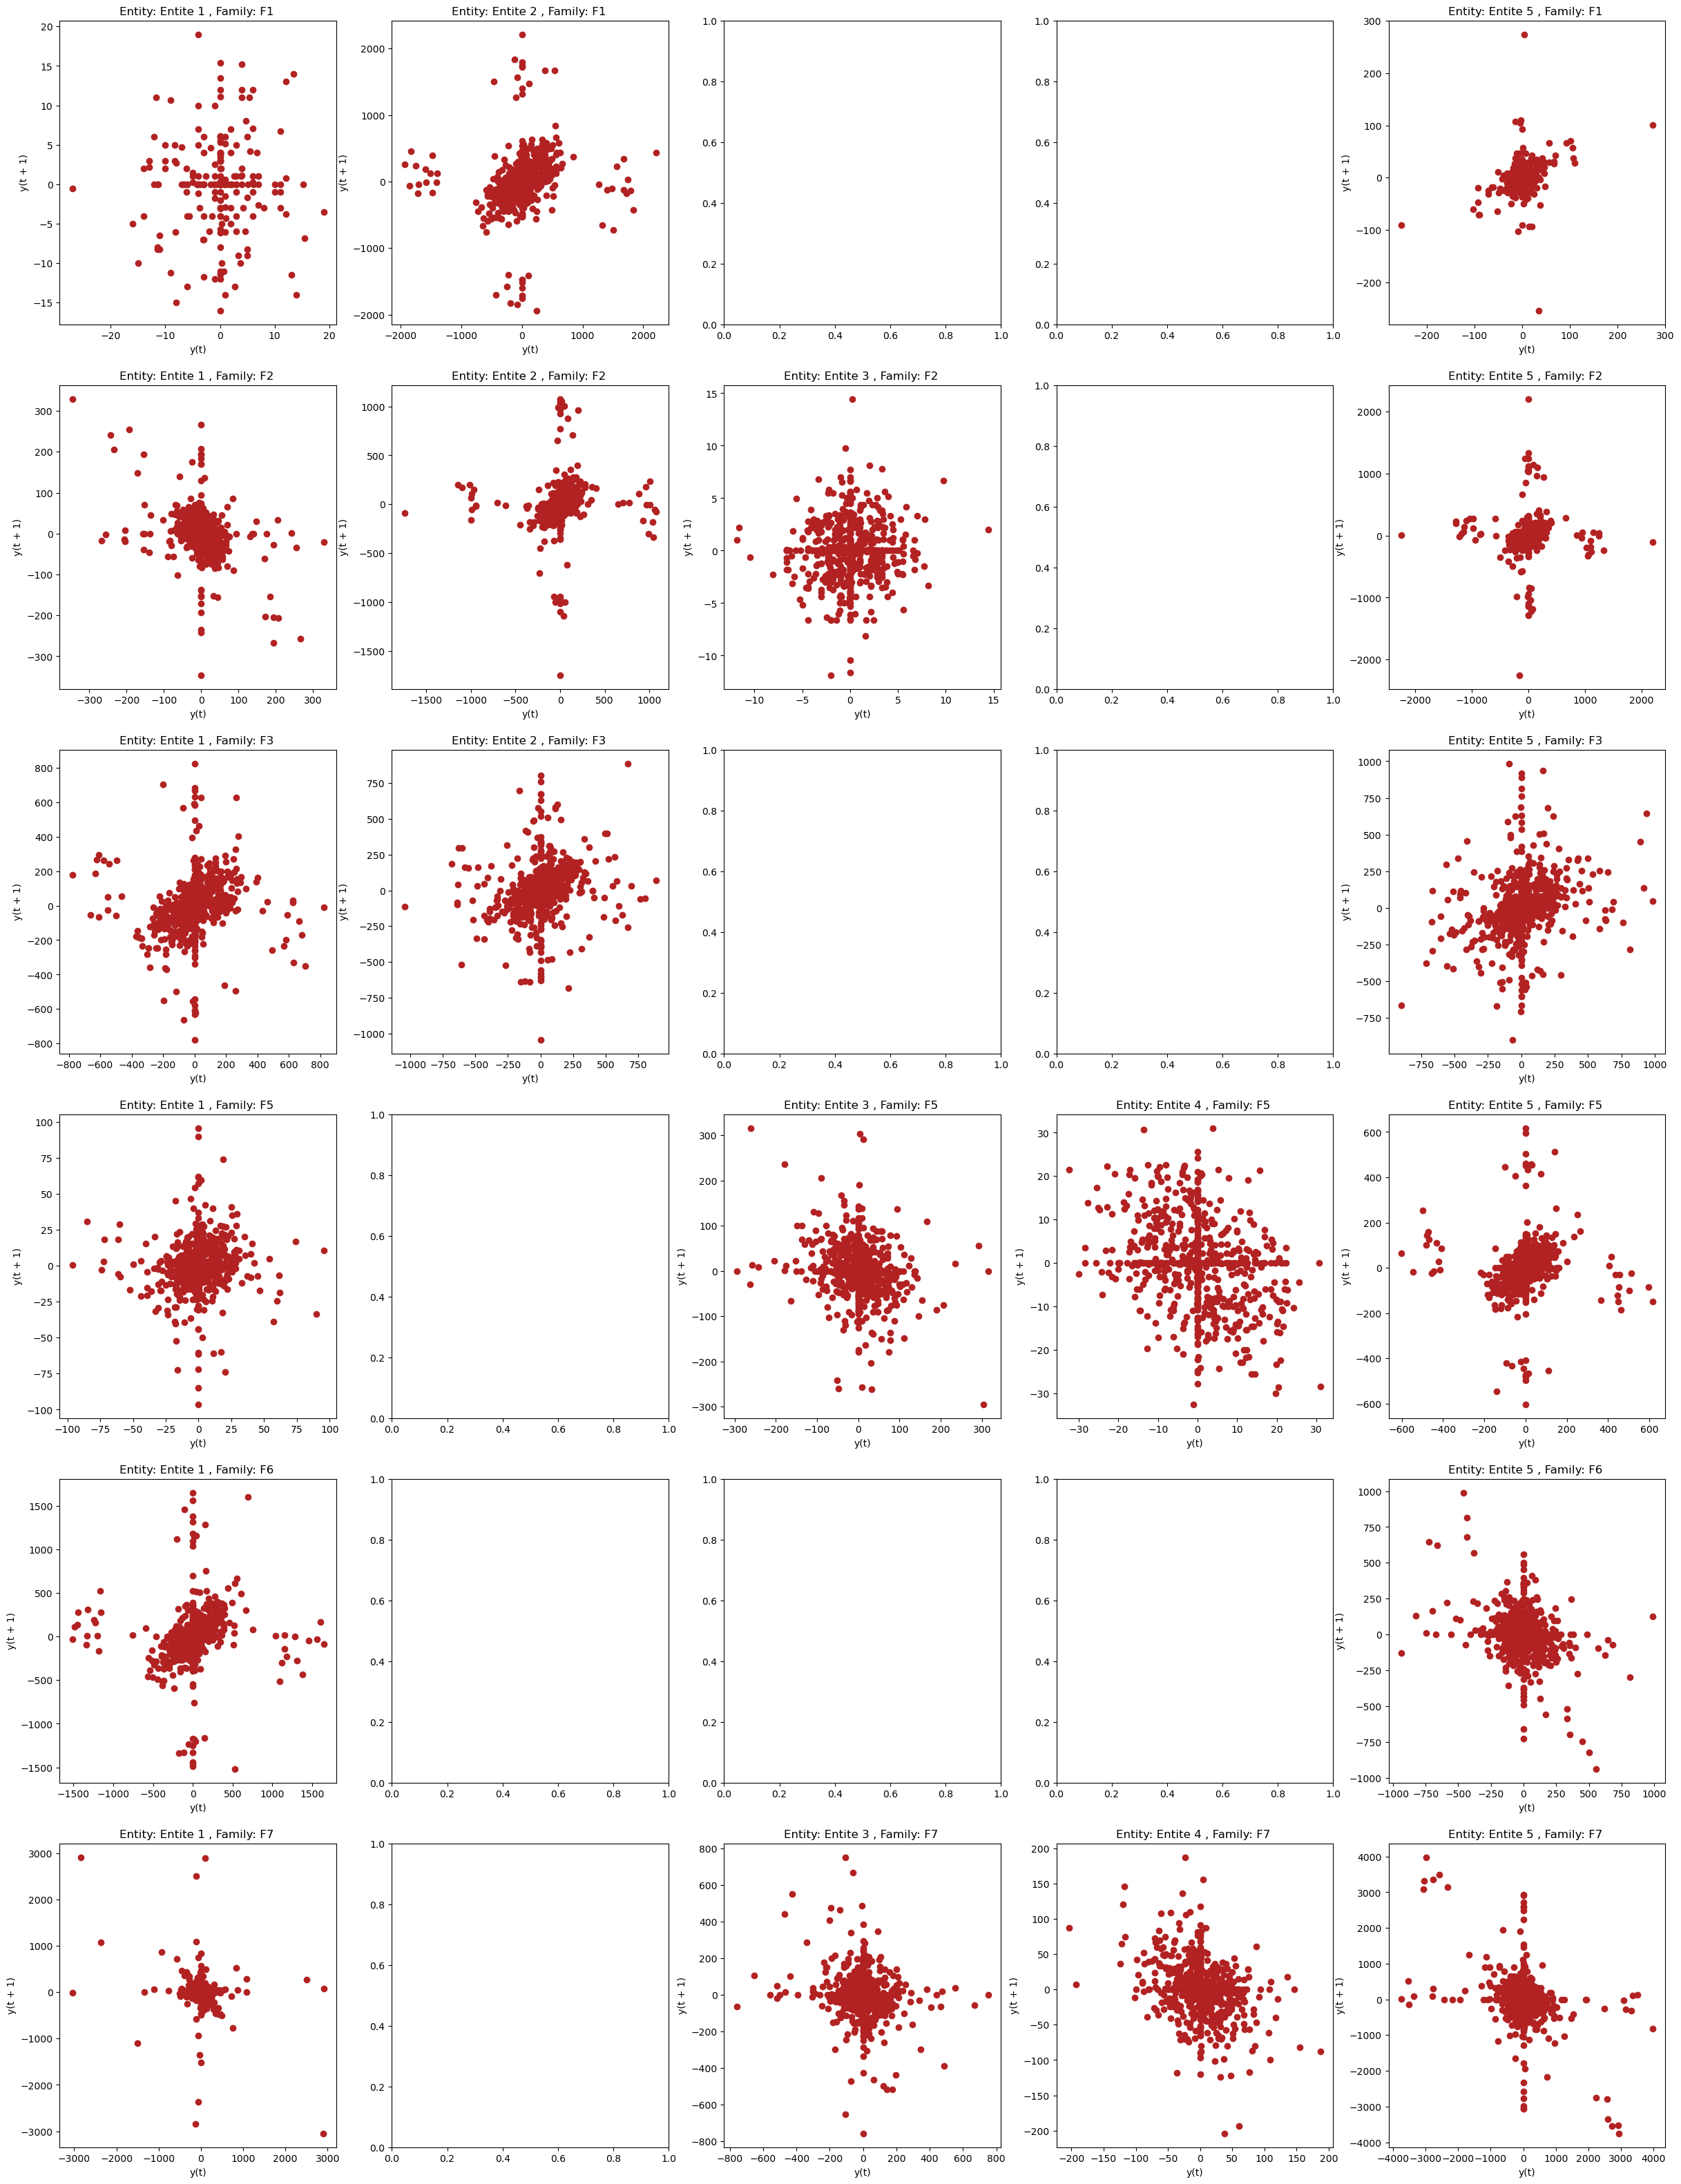

In [7]:

from pandas.plotting import lag_plot

df_tel = pd.read_csv('data/df_saison_diff.csv', index_col="date_appel", parse_dates = True)
df_tel = df_tel.dropna()

liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

# Creating subplots for entities
fig, axs = plt.subplots(nrows=len(liste_famille), ncols=len(liste_entite), figsize=(30, 40))

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        
        ax = axs[i][j]
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        if len(df.index)>0: 

            lag_plot(df.Nombre_entrants_corrige, lag=1, ax=ax, c='firebrick')
            ax.set_title(f"Entity: {entite} , Family: {famille} ")  # Set the title for the subplot